In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

In [9]:
fulldata = pd.read_csv('C:\\Users\\whill\\OneDrive\\Desktop\\MGT of Fin Institutions\\Hills_A12\\fulldataA12.csv')
fulldata.drop(['Unnamed: 0'],axis =1, inplace = True)
fulldata['DATE'] = pd.to_datetime(fulldata['DATE'], format = '%Y%m%d')
fulldata.replace([np.inf, -np.inf], np.nan, inplace = True)
fulldata.fillna(0, inplace=True)
fulldata.head()

cusip     CIK          Company Name Form Type Date Filed  year Quarter  \
0  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
1  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
2  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
3  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
4  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   

                                   Filename  PERMNO       DATE  PERMCO  SHRCD  \
0  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-02   30061   11.0   
1  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-03   30061   11.0   
2  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-04   30061   11.0   
3  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-05   30061   11.0   
4  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-08   30061   11.0   

   ISSUNO  HEXCD  HSICCD      PRC     VOL  OPENPRC   ASKHI   BIDLO     BID  \
0       0      2  3555.0 -5.87500     0.0      NaN  6.0625  5.6875  5.6875   
1       0      2  3555.0  5.93750  3000.0   5.9375  5.9375  5.9375     NaN   
2       0      2  3555.0 -5.90625     0.0      NaN  6.1250  5.6875  5.6875   
3       0      2  3555.0  5.75000  5000.0   5.8125  5.8125  5.7500     NaN   
4       0      2  3555.0 -5.75000     0.0      NaN  6.0000  5.5000  5.5000   

      ASK  NUMTRD       RET       RETX     SHROUT  CFACPR  CFACSHR    VWRETD  
0  6.0625     NaN  0.010753   0.010753  7009000.0     1.0      1.0  0.006606  
1     NaN     NaN  0.010638   0.010638  7009000.0     1.0      1.0 -0.000155  
2  6.1250     NaN -0.005263  -0.005263  7009000.0     1.0      1.0 -0.007674  
3     NaN     NaN -0.026455  -0.026455  7009000.0     1.0      1.0 -0.001023  
4  6.0000     NaN  0.000000   0.000000  7009000.0     1.0      1.0  0.002686

In [10]:
dttf = [(fulldata['DATE'] == fulldata['Date Filed']), (fulldata['DATE'] != fulldata['Date Filed'])]
dtyn = [1,0]
fulldata['Filing Date Match'] = np.select(dttf, dtyn)

In [19]:
fulldata['Filing Date Match'].describe()

count    634311.000000
mean          0.004041
std           0.063437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Filing Date Match, dtype: float64

In [148]:
fulldata.head()

cusip     CIK          Company Name Form Type Date Filed  year Quarter  \
0  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
1  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
2  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
3  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
4  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   

                                   Filename  PERMNO       DATE  PERMCO  SHRCD  \
0  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-02   30061   11.0   
1  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-03   30061   11.0   
2  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-04   30061   11.0   
3  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-05   30061   11.0   
4  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-08   30061   11.0   

   ISSUNO  HEXCD  HSICCD      PRC     VOL  OPENPRC   ASKHI   BIDLO     BID  \
0       0      2  3555.0 -5.87500     0.0   0.0000  6.0625  5.6875  5.6875   
1       0      2  3555.0  5.93750  3000.0   5.9375  5.9375  5.9375  0.0000   
2       0      2  3555.0 -5.90625     0.0   0.0000  6.1250  5.6875  5.6875   
3       0      2  3555.0  5.75000  5000.0   5.8125  5.8125  5.7500  0.0000   
4       0      2  3555.0 -5.75000     0.0   0.0000  6.0000  5.5000  5.5000   

      ASK  NUMTRD       RET       RETX     SHROUT  CFACPR  CFACSHR    VWRETD  \
0  6.0625     0.0  0.010753   0.010753  7009000.0     1.0      1.0  0.006606   
1  0.0000     0.0  0.010638   0.010638  7009000.0     1.0      1.0 -0.000155   
2  6.1250     0.0 -0.005263  -0.005263  7009000.0     1.0      1.0 -0.007674   
3  0.0000     0.0 -0.026455  -0.026455  7009000.0     1.0      1.0 -0.001023   
4  6.0000     0.0  0.000000   0.000000  7009000.0     1.0      1.0  0.002686   

   Filing Date Match  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [149]:
def olsregress(df, x, y):
    X = sm.add_constant(df[x])
    reg = sm.OLS(df[y], X).fit()
    #print(reg.summary())
    return reg.params

In [152]:
regresults = fulldata.groupby('cusip').apply(olsregress, 'VWRETD', 'RET')
regresults

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     15.46
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           0.000109
Time:                        15:03:59   Log-Likelihood:                 433.94
No. Observations:                 252   AIC:                            -863.9
Df Residuals:                     250   BIC:                            -856.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.003     -0.112      0.9

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     74.69
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.68e-16
Time:                        15:03:59   Log-Likelihood:                 724.78
No. Observations:                 252   AIC:                            -1446.
Df Residuals:                     250   BIC:                            -1439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.505      0.6

C:\Users\whill\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           5.91e-06
Time:                        15:03:59   Log-Likelihood:                 294.68
No. Observations:                 252   AIC:                            -585.4
Df Residuals:                     250   BIC:                            -578.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.005     -0.250      0.8

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     166.9
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.30e-29
Time:                        15:03:59   Log-Likelihood:                 573.38
No. Observations:                 253   AIC:                            -1143.
Df Residuals:                     251   BIC:                            -1136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.607      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     61.25
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.44e-13
Time:                        15:03:59   Log-Likelihood:                 655.90
No. Observations:                 251   AIC:                            -1308.
Df Residuals:                     249   BIC:                            -1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.294      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1365
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.712
Time:                        15:03:59   Log-Likelihood:                 541.23
No. Observations:                 280   AIC:                            -1078.
Df Residuals:                     278   BIC:                            -1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.352      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     75.79
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           4.35e-16
Time:                        15:04:00   Log-Likelihood:                 729.72
No. Observations:                 252   AIC:                            -1455.
Df Residuals:                     250   BIC:                            -1448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.201      0.8

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     43.04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.07e-10
Time:                        15:04:00   Log-Likelihood:                 553.04
No. Observations:                 252   AIC:                            -1102.
Df Residuals:                     250   BIC:                            -1095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.002     -0.972      0.3

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.99e-23
Time:                        15:04:00   Log-Likelihood:                 723.93
No. Observations:                 252   AIC:                            -1444.
Df Residuals:                     250   BIC:                            -1437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.398      0.6

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5504
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.459
Time:                        15:04:00   Log-Likelihood:                 651.70
No. Observations:                 251   AIC:                            -1299.
Df Residuals:                     249   BIC:                            -1292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.282      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     76.13
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.69e-17
Time:                        15:04:00   Log-Likelihood:                 1185.2
No. Observations:                 756   AIC:                            -2366.
Df Residuals:                     754   BIC:                            -2357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.553      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.55e-25
Time:                        15:04:01   Log-Likelihood:                 1157.1
No. Observations:                 504   AIC:                            -2310.
Df Residuals:                     502   BIC:                            -2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.639e-06      0.001      0.006      0.9

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.763
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0324
Time:                        15:04:01   Log-Likelihood:                 163.26
No. Observations:                  72   AIC:                            -322.5
Df Residuals:                      70   BIC:                            -318.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.003      1.252      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     340.6
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.22e-48
Time:                        15:04:01   Log-Likelihood:                 672.90
No. Observations:                 253   AIC:                            -1342.
Df Residuals:                     251   BIC:                            -1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.360      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     11.83
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           0.000682
Time:                        15:04:01   Log-Likelihood:                 212.58
No. Observations:                 252   AIC:                            -421.2
Df Residuals:                     250   BIC:                            -414.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.007      1.021      0.3

C:\Users\whill\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     80.92
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.02e-17
Time:                        15:04:01   Log-Likelihood:                 754.15
No. Observations:                 252   AIC:                            -1504.
Df Residuals:                     250   BIC:                            -1497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.281      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02842
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.866
Time:                        15:04:02   Log-Likelihood:                 590.81
No. Observations:                 252   AIC:                            -1178.
Df Residuals:                     250   BIC:                            -1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.372      0.1

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.65
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.69e-05
Time:                        15:04:02   Log-Likelihood:                 363.52
No. Observations:                 252   AIC:                            -723.0
Df Residuals:                     250   BIC:                            -716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.004      1.107      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     48.45
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.97e-11
Time:                        15:04:02   Log-Likelihood:                 474.64
No. Observations:                 252   AIC:                            -945.3
Df Residuals:                     250   BIC:                            -938.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.002     -1.797      0.0

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     34.39
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           8.20e-09
Time:                        15:04:02   Log-Likelihood:                 1128.2
No. Observations:                 502   AIC:                            -2252.
Df Residuals:                     500   BIC:                            -2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.806      0.4

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.086
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.299
Time:                        15:04:02   Log-Likelihood:                 47.194
No. Observations:                 188   AIC:                            -90.39
Df Residuals:                     186   BIC:                            -83.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.014      0.295      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.274
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0716
Time:                        15:04:02   Log-Likelihood:                 586.15
No. Observations:                 252   AIC:                            -1168.
Df Residuals:                     250   BIC:                            -1161.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.001      2.846      0.0

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.88e-29
Time:                        15:04:03   Log-Likelihood:                 1272.7
No. Observations:                 503   AIC:                            -2541.
Df Residuals:                     501   BIC:                            -2533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.720      0.4

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     59.37
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           4.13e-14
Time:                        15:04:03   Log-Likelihood:                 1369.9
No. Observations:                 755   AIC:                            -2736.
Df Residuals:                     753   BIC:                            -2726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.153      0.8

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.78e-24
Time:                        15:04:03   Log-Likelihood:                 515.42
No. Observations:                 251   AIC:                            -1027.
Df Residuals:                     249   BIC:                            -1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.002     -0.615      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.185
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.277
Time:                        15:04:03   Log-Likelihood:                 463.88
No. Observations:                 252   AIC:                            -923.8
Df Residuals:                     250   BIC:                            -916.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.002      1.509      0.1

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.03352
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.855
Time:                        15:04:03   Log-Likelihood:                 414.42
No. Observations:                 252   AIC:                            -824.8
Df Residuals:                     250   BIC:                            -817.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.003     -0.573      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     722.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.08e-75
Time:                        15:04:04   Log-Likelihood:                 777.66
No. Observations:                 252   AIC:                            -1551.
Df Residuals:                     250   BIC:                            -1544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.679      0.4

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     56.25
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.11e-12
Time:                        15:04:04   Log-Likelihood:                 594.04
No. Observations:                 252   AIC:                            -1184.
Df Residuals:                     250   BIC:                            -1177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.001     -1.044      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9880
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.322
Time:                        15:04:04   Log-Likelihood:                 300.54
No. Observations:                 167   AIC:                            -597.1
Df Residuals:                     165   BIC:                            -590.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.003     -0.873      0.3

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     627.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          4.10e-101
Time:                        15:04:04   Log-Likelihood:                 2264.4
No. Observations:                 754   AIC:                            -4525.
Df Residuals:                     752   BIC:                            -4516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.042      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     162.2
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           5.76e-29
Time:                        15:04:04   Log-Likelihood:                 732.63
No. Observations:                 252   AIC:                            -1461.
Df Residuals:                     250   BIC:                            -1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.674      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     47.13
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           5.23e-11
Time:                        15:04:05   Log-Likelihood:                 720.19
No. Observations:                 252   AIC:                            -1436.
Df Residuals:                     250   BIC:                            -1429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.061      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.512
Date:                Sun, 12 Dec 2021   Prob (F-statistic):            0.00396
Time:                        15:04:05   Log-Likelihood:                 314.19
No. Observations:                 190   AIC:                            -624.4
Df Residuals:                     188   BIC:                            -617.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.003     -0.817      0.4

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     53.50
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.51e-12
Time:                        15:04:05   Log-Likelihood:                 418.31
No. Observations:                 252   AIC:                            -832.6
Df Residuals:                     250   BIC:                            -825.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.003     -1.751      0.0

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8197
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.366
Time:                        15:04:05   Log-Likelihood:                 1305.3
No. Observations:                 503   AIC:                            -2607.
Df Residuals:                     501   BIC:                            -2598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.329      0.1

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.33e-23
Time:                        15:04:05   Log-Likelihood:                 457.33
No. Observations:                 253   AIC:                            -910.7
Df Residuals:                     251   BIC:                            -903.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.647e-06      0.003     -0.004      0.9

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           6.92e-23
Time:                        15:04:05   Log-Likelihood:                 1117.8
No. Observations:                 502   AIC:                            -2232.
Df Residuals:                     500   BIC:                            -2223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.303      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     48.01
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.59e-11
Time:                        15:04:06   Log-Likelihood:                 664.62
No. Observations:                 252   AIC:                            -1325.
Df Residuals:                     250   BIC:                            -1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -0.658      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     32.53
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.30e-08
Time:                        15:04:06   Log-Likelihood:                 619.87
No. Observations:                 252   AIC:                            -1236.
Df Residuals:                     250   BIC:                            -1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      1.083      0.2

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     168.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           7.22e-30
Time:                        15:04:06   Log-Likelihood:                 666.02
No. Observations:                 253   AIC:                            -1328.
Df Residuals:                     251   BIC:                            -1321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.285      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     7.930
Date:                Sun, 12 Dec 2021   Prob (F-statistic):            0.00526
Time:                        15:04:06   Log-Likelihood:                 261.97
No. Observations:                 248   AIC:                            -519.9
Df Residuals:                     246   BIC:                            -512.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.005     -0.237      0.8

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     22.62
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.34e-06
Time:                        15:04:06   Log-Likelihood:                 396.29
No. Observations:                 251   AIC:                            -788.6
Df Residuals:                     249   BIC:                            -781.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.003     -1.377      0.1

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     67.32
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.21e-14
Time:                        15:04:07   Log-Likelihood:                 338.63
No. Observations:                 253   AIC:                            -673.3
Df Residuals:                     251   BIC:                            -666.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.004      0.146      0.8

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     50.15
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.45e-11
Time:                        15:04:07   Log-Likelihood:                 532.19
No. Observations:                 251   AIC:                            -1060.
Df Residuals:                     249   BIC:                            -1053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.912e-05      0.002      0.054      0.9

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.09956
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.754
Time:                        15:04:07   Log-Likelihood:                 88.069
No. Observations:                  55   AIC:                            -172.1
Df Residuals:                      53   BIC:                            -168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.007      0.077      0.9

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     53.84
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.03e-12
Time:                        15:04:07   Log-Likelihood:                 674.73
No. Observations:                 252   AIC:                            -1345.
Df Residuals:                     250   BIC:                            -1338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.725      0.4

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     20.51
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           9.18e-06
Time:                        15:04:07   Log-Likelihood:                 536.87
No. Observations:                 252   AIC:                            -1070.
Df Residuals:                     250   BIC:                            -1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.002     -2.136      0.0

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     84.17
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.82e-17
Time:                        15:04:08   Log-Likelihood:                 878.62
No. Observations:                 250   AIC:                            -1753.
Df Residuals:                     248   BIC:                            -1746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.667      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     41.23
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.15e-10
Time:                        15:04:08   Log-Likelihood:                 1280.2
No. Observations:                 503   AIC:                            -2556.
Df Residuals:                     501   BIC:                            -2548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.586e-05      0.001     -0.101      0.9

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     8.987
Date:                Sun, 12 Dec 2021   Prob (F-statistic):            0.00300
Time:                        15:04:08   Log-Likelihood:                 410.11
No. Observations:                 248   AIC:                            -816.2
Df Residuals:                     246   BIC:                            -809.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.003      0.988      0.3

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     15.17
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           0.000126
Time:                        15:04:08   Log-Likelihood:                 426.76
No. Observations:                 252   AIC:                            -849.5
Df Residuals:                     250   BIC:                            -842.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.003     -0.684      0.4

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     31.29
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           5.81e-08
Time:                        15:04:08   Log-Likelihood:                 600.51
No. Observations:                 252   AIC:                            -1197.
Df Residuals:                     250   BIC:                            -1190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      1.305      0.1

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.621
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.204
Time:                        15:04:09   Log-Likelihood:                 449.34
No. Observations:                 252   AIC:                            -894.7
Df Residuals:                     250   BIC:                            -887.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.296      0.7

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     242.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.38e-47
Time:                        15:04:09   Log-Likelihood:                 1849.4
No. Observations:                 756   AIC:                            -3695.
Df Residuals:                     754   BIC:                            -3685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.173      0.8

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.34e-31
Time:                        15:04:09   Log-Likelihood:                 757.00
No. Observations:                 253   AIC:                            -1510.
Df Residuals:                     251   BIC:                            -1503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.673      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     260.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.51e-47
Time:                        15:04:09   Log-Likelihood:                 947.01
No. Observations:                 504   AIC:                            -1890.
Df Residuals:                     502   BIC:                            -1882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.448      0.6

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     43.33
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.39e-10
Time:                        15:04:09   Log-Likelihood:                 872.43
No. Observations:                 421   AIC:                            -1741.
Df Residuals:                     419   BIC:                            -1733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.594      0.5

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4709
Date:                Sun, 12 Dec 2021   Prob (F-statistic):              0.493
Time:                        15:04:09   Log-Likelihood:                 158.49
No. Observations:                 252   AIC:                            -313.0
Df Residuals:                     250   BIC:                            -305.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.008     -0.572      0.5

const    VWRETD
cusip                     
00086T -0.000308  0.924641
00101J -0.001331  0.875416
00130H  0.002391  0.673373
00175J  0.000000  0.000000
00206P  0.002768 -0.052475
...          ...       ...
P8744Y  0.000641  0.789429
U72603 -0.001062  0.756688
V7780T  0.001444  2.108977
Y2573F -0.000927  1.925311
Y26889 -0.000358  1.101411

[2007 rows x 2 columns]

In [153]:
regresults.reset_index(inplace=True)
regresults.rename(columns = {'const' : 'alpha', 'VWRETD': 'beta'}, inplace=True)
regresults.head()
fulldatacp = pd.merge(fulldata, regresults, how='inner', on='cusip')
fulldatacp.head()

cusip     CIK          Company Name Form Type Date Filed  year Quarter  \
0  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
1  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
2  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
3  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   
4  625440  2310.0  AM INTERNATIONAL INC       8-K  7/18/1996  1996    QTR3   

                                   Filename  PERMNO       DATE  PERMCO  SHRCD  \
0  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-02   30061   11.0   
1  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-03   30061   11.0   
2  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-04   30061   11.0   
3  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-05   30061   11.0   
4  edgar/data/2310/0000002310-96-000014.txt   80071 1996-01-08   30061   11.0   

   ISSUNO  HEXCD  HSICCD      PRC     VOL  OPENPRC   ASKHI   BIDLO     BID  \
0       0      2  3555.0 -5.87500     0.0   0.0000  6.0625  5.6875  5.6875   
1       0      2  3555.0  5.93750  3000.0   5.9375  5.9375  5.9375  0.0000   
2       0      2  3555.0 -5.90625     0.0   0.0000  6.1250  5.6875  5.6875   
3       0      2  3555.0  5.75000  5000.0   5.8125  5.8125  5.7500  0.0000   
4       0      2  3555.0 -5.75000     0.0   0.0000  6.0000  5.5000  5.5000   

      ASK  NUMTRD       RET       RETX     SHROUT  CFACPR  CFACSHR    VWRETD  \
0  6.0625     0.0  0.010753   0.010753  7009000.0     1.0      1.0  0.006606   
1  0.0000     0.0  0.010638   0.010638  7009000.0     1.0      1.0 -0.000155   
2  6.1250     0.0 -0.005263  -0.005263  7009000.0     1.0      1.0 -0.007674   
3  0.0000     0.0 -0.026455  -0.026455  7009000.0     1.0      1.0 -0.001023   
4  6.0000     0.0  0.000000   0.000000  7009000.0     1.0      1.0  0.002686   

   Filing Date Match  alpha      beta  
0                  0  0.001 -0.287764  
1                  0  0.001 -0.287764  
2                  0  0.001 -0.287764  
3                  0  0.001 -0.287764  
4                  0  0.001 -0.287764

In [155]:
fulldatacp['AR'] = fulldatacp['RET'] - (fulldatacp['alpha'] + fulldatacp['beta']*fulldatacp['VWRETD'])
fulldatacp['CAR(0)'] = fulldatacp['AR']
fulldatacp['CAR(-1,+1)'] = fulldatacp.groupby(['cusip'])['AR'].shift(1).rolling(3).sum().shift(-1)
fulldatacp['CAR(-2,+2)'] = fulldatacp.groupby(['cusip'])['AR'].shift(2).rolling(5).sum().shift(-2)
fulldatacp['CAR(-3,+3)'] = fulldatacp.groupby(['cusip'])['AR'].shift(3).rolling(7).sum().shift(-3)
fulldatacp['CAR(-5,+5)'] = fulldatacp.groupby(['cusip'])['AR'].shift(5).rolling(11).sum().shift(-5)

In [156]:
matchfiledates = fulldatacp.loc[fulldatacp['Filing Date Match'] == 1]
descstatsdata = matchfiledates[['CIK', 'CAR(0)','CAR(-1,+1)','CAR(-2,+2)','CAR(-3,+3)','CAR(-5,+5)']]
descstatsdata.head()

CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)
138      2310.0 -0.051962   -0.051464   -0.160975    0.065930    0.041623
305    764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986
625    764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582
858      1923.0  0.000993    0.042781    0.045301   -0.000927    0.022436
1088  1122304.0  0.048764    0.044443    0.032067    0.023262    0.026370

In [157]:
descstatsdata.describe()

CIK       CAR(0)   CAR(-1,+1)   CAR(-2,+2)   CAR(-3,+3)  \
count  2.563000e+03  2563.000000  2540.000000  2512.000000  2494.000000   
mean   9.705688e+05     0.000157     0.000513     0.001237     0.002725   
std    3.859508e+05     0.056988     0.088733     0.108938     0.122467   
min    1.923000e+03    -0.387500    -0.517908    -0.600737    -0.531286   
25%    8.547380e+05    -0.016054    -0.028616    -0.034604    -0.039749   
50%    1.007019e+06    -0.000694    -0.000980    -0.002272    -0.004030   
75%    1.137055e+06     0.015284     0.024345     0.030208     0.036071   
max    1.773427e+06     0.736642     1.826224     2.037802     2.044569   

        CAR(-5,+5)  
count  2461.000000  
mean      0.003441  
std       0.138311  
min      -0.783272  
25%      -0.047959  
50%      -0.000156  
75%       0.046967  
max       1.871540

In [210]:
def ttests(df, ident): 
    mu = 0
    tvalue = (df[ident].mean() - mu)/(df[ident].std()/np.sqrt(df[ident].count()))
    return print(f'The t-value for {ident}: {tvalue}')

The t-value for CAR(0): 0.13947862730116362


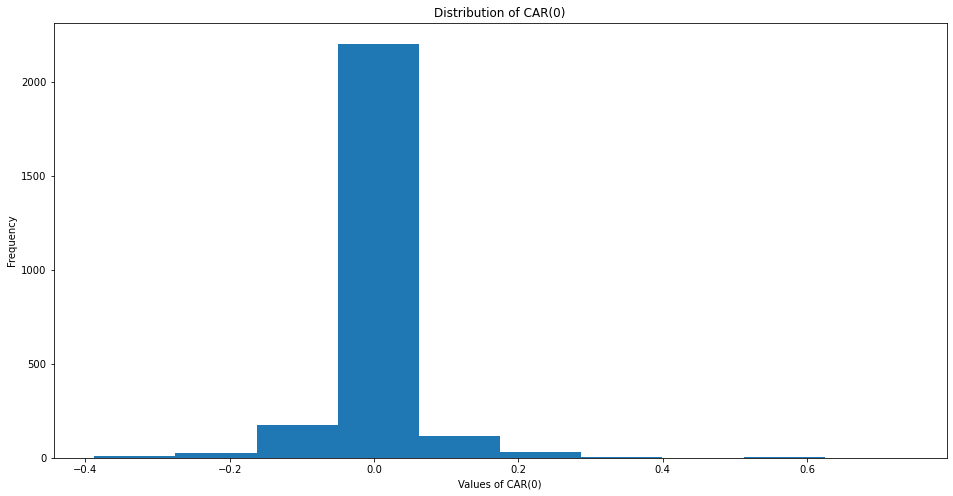

The t-value for CAR(-1,+1): 0.29126724361752837


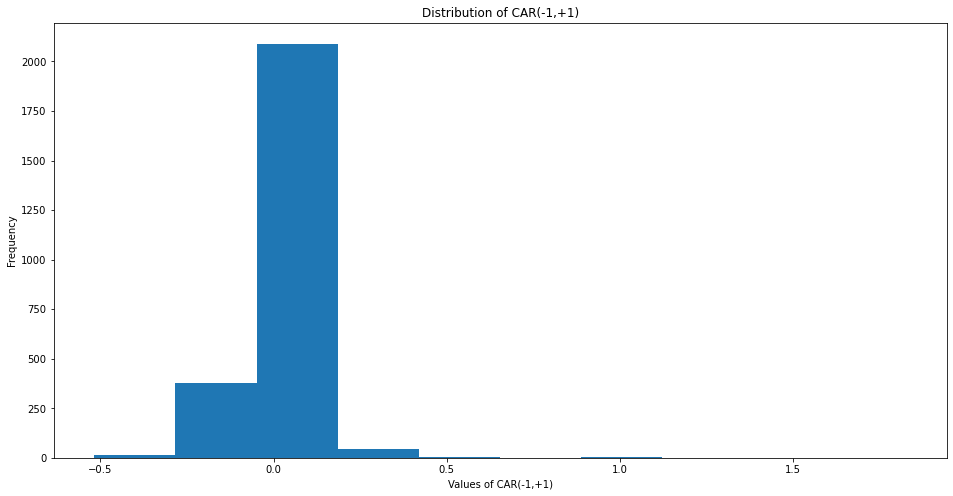

The t-value for CAR(-2,+2): 0.5692405763700906


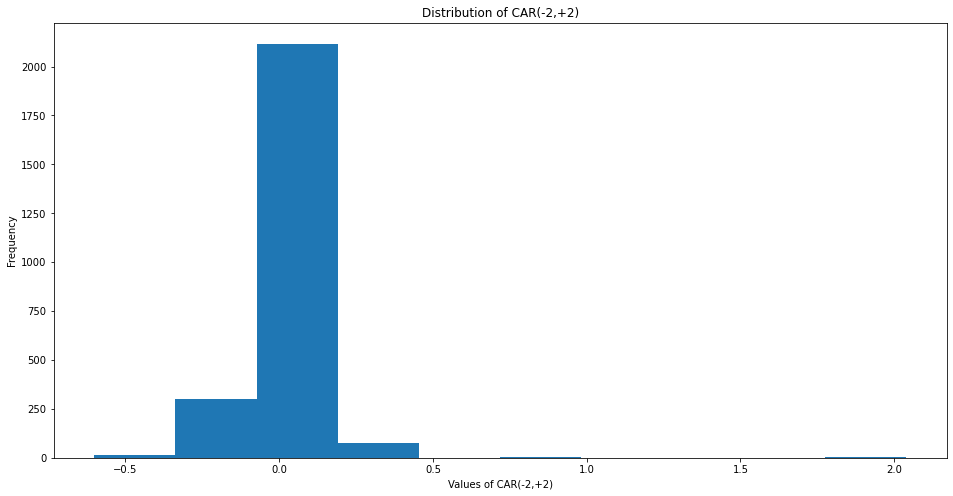

The t-value for CAR(-3,+3): 1.1110358904688178


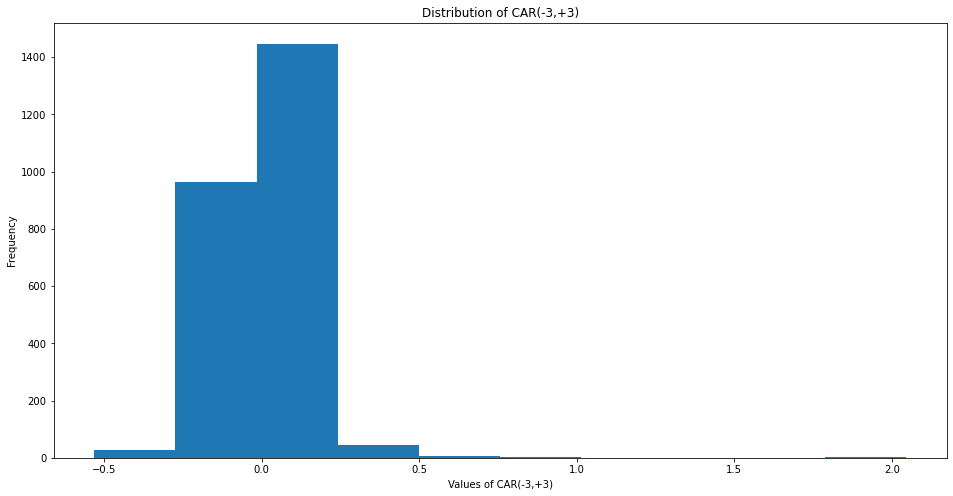

The t-value for CAR(-5,+5): 1.2340924366520298


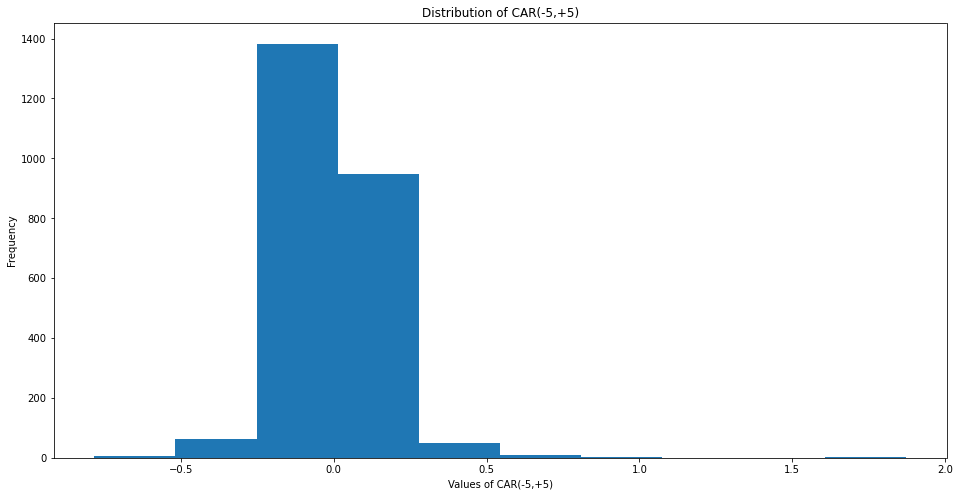

In [238]:
carlist= ('CAR(0)','CAR(-1,+1)','CAR(-2,+2)','CAR(-3,+3)','CAR(-5,+5)')
for car in carlist:
    ttests(descstatsdata, car)
    plt.figure(figsize= (16,8))
    plt.hist(descstatsdata[car])
    plt.ylabel('Frequency')
    plt.xlabel(f'Values of {car}')
    plt.title(f'Distribution of {car}')
    plt.show()

### Here we can see that t-statistic values for the data are very small. Given that it is a random sample other data may have worked better. The distribution of CAR gets wider as we increase the number of days surrounding the event date. Hence why we have an increase in t-values.  

In [213]:
descstatsdata.to_csv('C:\\Users\\whill\\OneDrive\\Desktop\\MGT of Fin Institutions\\Hills_A12\\descstatsCAR.csv')

# Sentiment Analysis Step 1

In [217]:
tonescores = pd.read_csv('C:\\Users\\whill\\OneDrive\\Desktop\\MGT of Fin Institutions\\Hills_A12\\tonescores.csv')
tonescores.drop(['Unnamed: 0'], axis = 1, inplace=True)
tonescores

CIK  Tone Score
0     101771   -0.018425
1     104030   -0.012346
2      19617   -0.006452
3     201499   -0.005801
4     201513    0.004380
...      ...         ...
5176  921738    0.000809
5177  922864    0.000453
5178  928054   -0.001389
5179  945764   -0.003988
5180  946581   -0.000238

[5181 rows x 2 columns]

In [232]:
step1sentiment = pd.merge(descstatsdata, tonescores, how='inner', on='CIK')
step1sentiment['Quintiles'] = pd.qcut(step1sentiment['Tone Score'], q = 5, labels= ['5','4','3','2','1'])
step1sentiment['Quintiles'] = pd.to_numeric(step1sentiment['Quintiles'], errors='coerce')
step1sentiment

CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
0       2310.0 -0.051962   -0.051464   -0.160975    0.065930    0.041623   
1     764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
2     764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
3     764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
4     764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
...        ...       ...         ...         ...         ...         ...   
4429  921114.0 -0.250451   -0.353438   -0.461260   -0.316572   -0.316334   
4430  921114.0 -0.250451   -0.353438   -0.461260   -0.316572   -0.316334   
4431  921114.0 -0.067316    0.074937   -0.113655   -0.209352   -0.211745   
4432  921114.0 -0.067316    0.074937   -0.113655   -0.209352   -0.211745   
4433  921114.0 -0.067316    0.074937   -0.113655   -0.209352   -0.211745   

      Tone Score  Quintiles  
0      -0.001931          4  
1       0.000248          2  
2       0.000142          2  
3       0.000248          2  
4       0.000142          2  
...          ...        ...  
4429   -0.010295          5  
4430   -0.001155          3  
4431   -0.010242          5  
4432   -0.010295          5  
4433   -0.001155          3  

[4434 rows x 8 columns]

Quintile 1:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
19  763730.0  0.304661    0.182847    0.346056    0.336440    0.233732   
23    7039.0  0.045241    0.032369   -0.032643   -0.035586   -0.095870   
25    7039.0 -0.034278   -0.032183   -0.121693   -0.142879   -0.168344   
38  732712.0  0.024751    0.006356   -0.005420    0.048999    0.053423   
39  732712.0  0.024751    0.006356   -0.005420    0.048999    0.053423   

    Tone Score  Quintiles  
19    0.001297          1  
23    0.003540          1  
25    0.003540          1  
38    0.004454          1  
39    0.005946          1  
The t-value for CAR(0): -0.22389651289136794


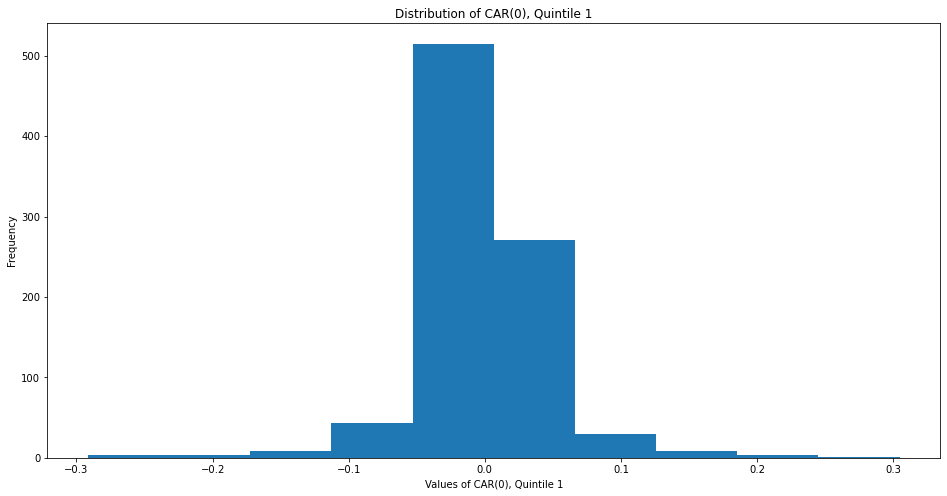

The t-value for CAR(-1,+1): -0.4490966895064568


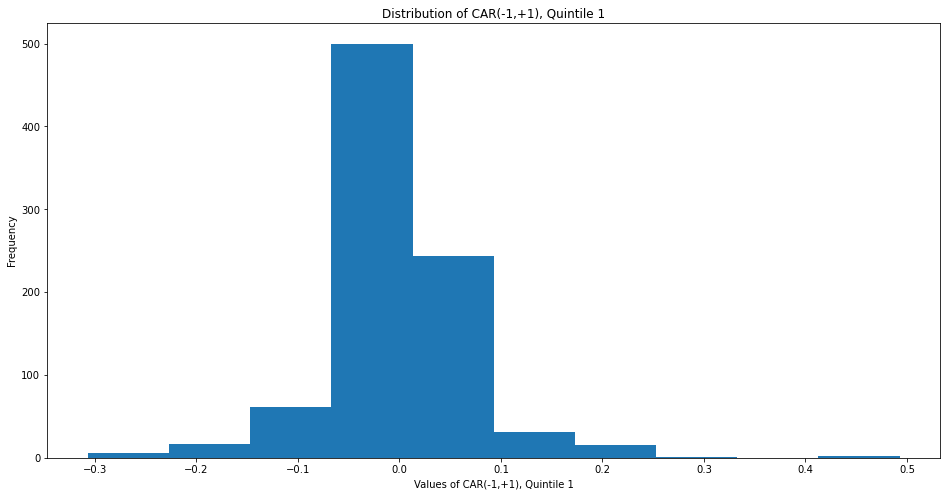

The t-value for CAR(-2,+2): 0.23094308285453263


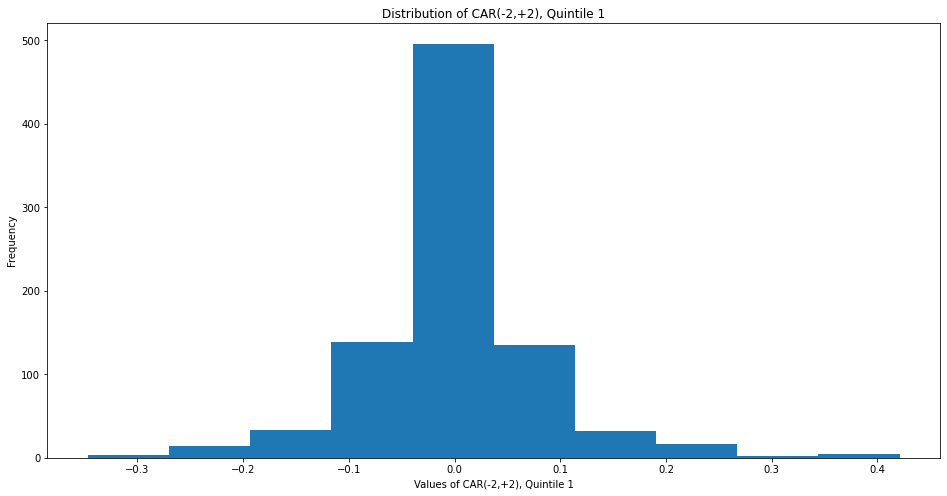

The t-value for CAR(-3,+3): 1.0849543127654768


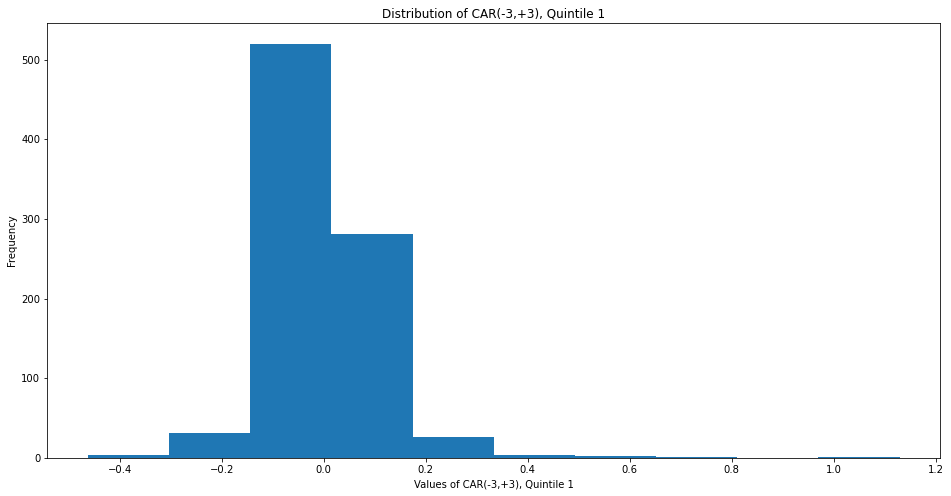

The t-value for CAR(-5,+5): 1.3568117120857397


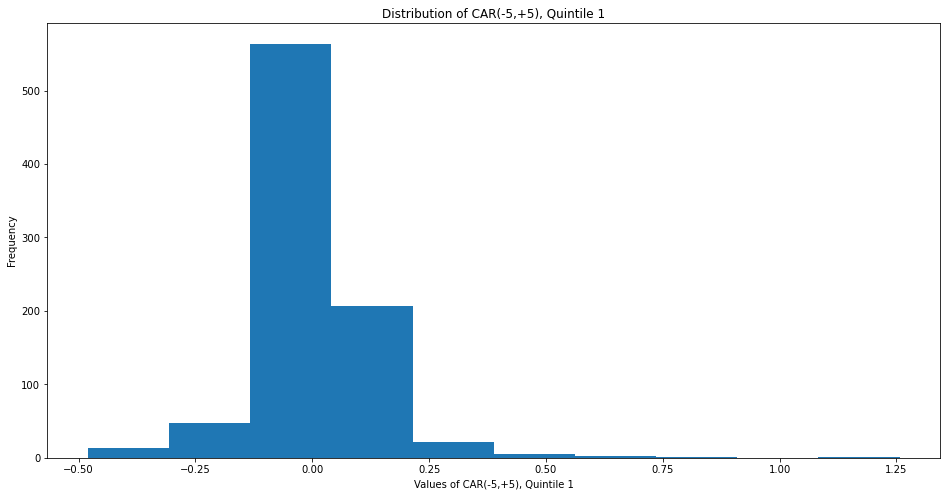

Quintile 2:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
1   764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
2   764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
3   764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
4   764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
6  1122304.0  0.048764    0.044443    0.032067    0.023262    0.026370   

   Tone Score  Quintiles  
1    0.000248          2  
2    0.000142          2  
3    0.000248          2  
4    0.000142          2  
6    0.000709          2  
The t-value for CAR(0): 0.7969884791069104


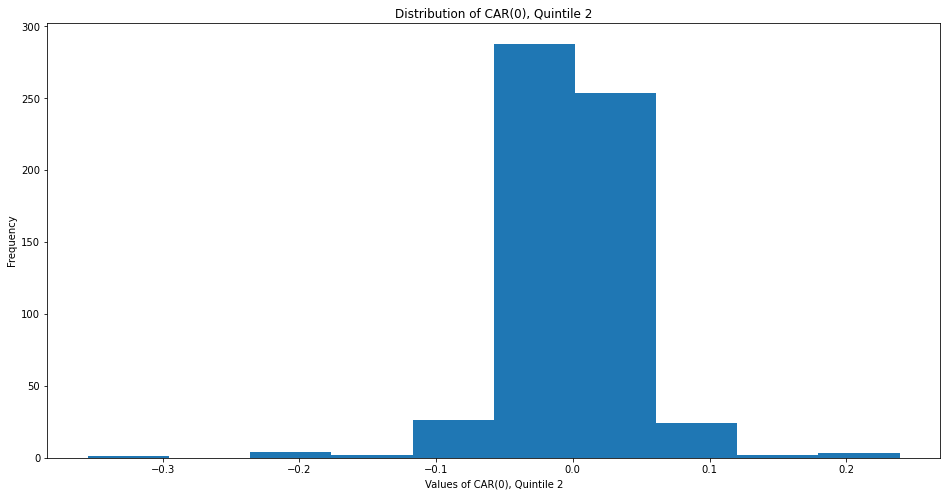

The t-value for CAR(-1,+1): 1.8975350998334097


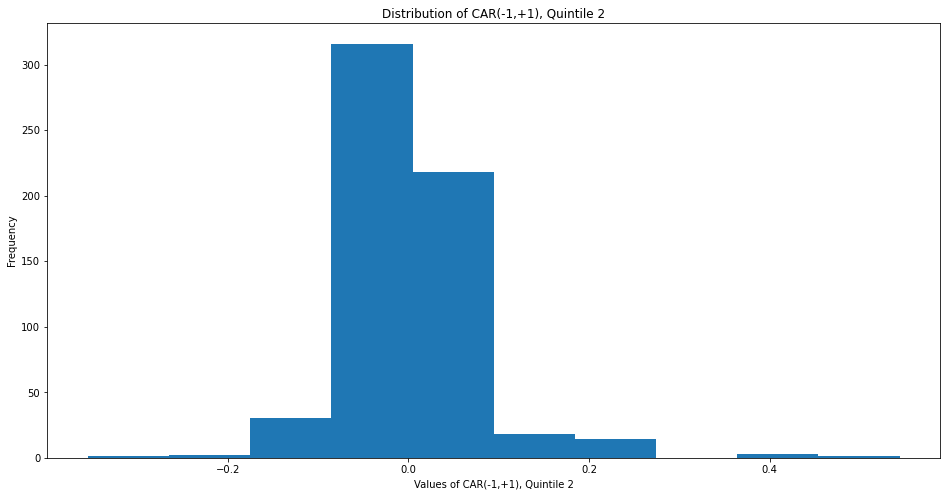

The t-value for CAR(-2,+2): 1.265566981738081


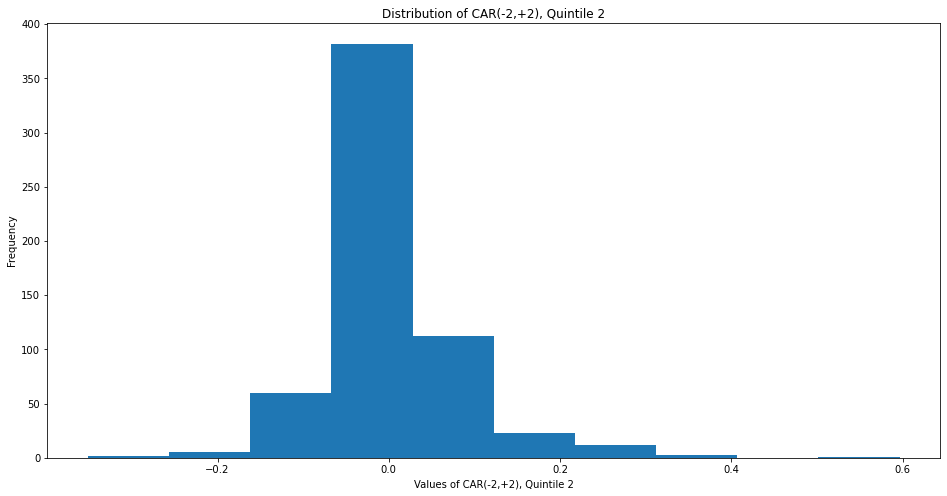

The t-value for CAR(-3,+3): 0.5896811883735578


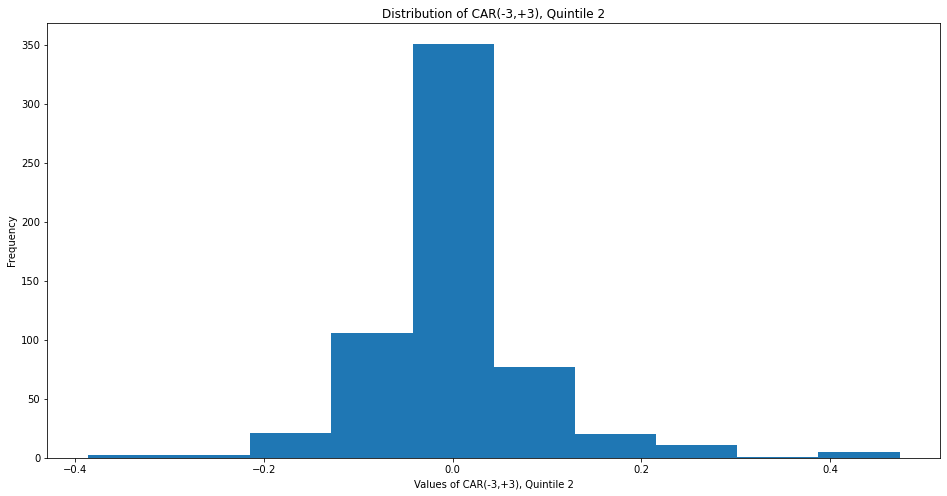

The t-value for CAR(-5,+5): 1.5944069967001395


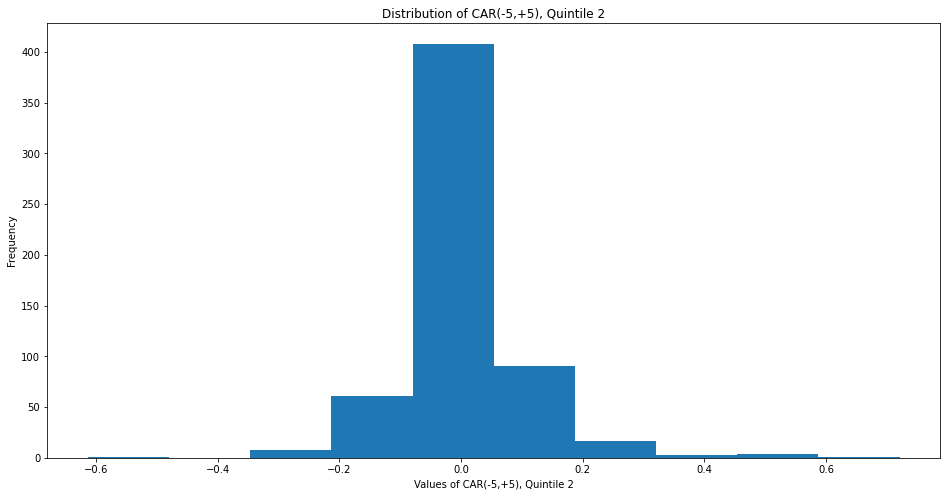

Quintile 3:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
20  311471.0 -0.005424    0.005871    0.034287    0.038698    0.024542   
24    7039.0  0.045241    0.032369   -0.032643   -0.035586   -0.095870   
26    7039.0 -0.034278   -0.032183   -0.121693   -0.142879   -0.168344   
35    9435.0 -0.016257   -0.038560   -0.063492   -0.084250   -0.113814   
47   12978.0 -0.023119   -0.006291    0.001026    0.002471   -0.052554   

    Tone Score  Quintiles  
20   -0.000211          3  
24   -0.000283          3  
26   -0.000283          3  
35    0.000000          3  
47   -0.000080          3  
The t-value for CAR(0): 1.0007111892534035


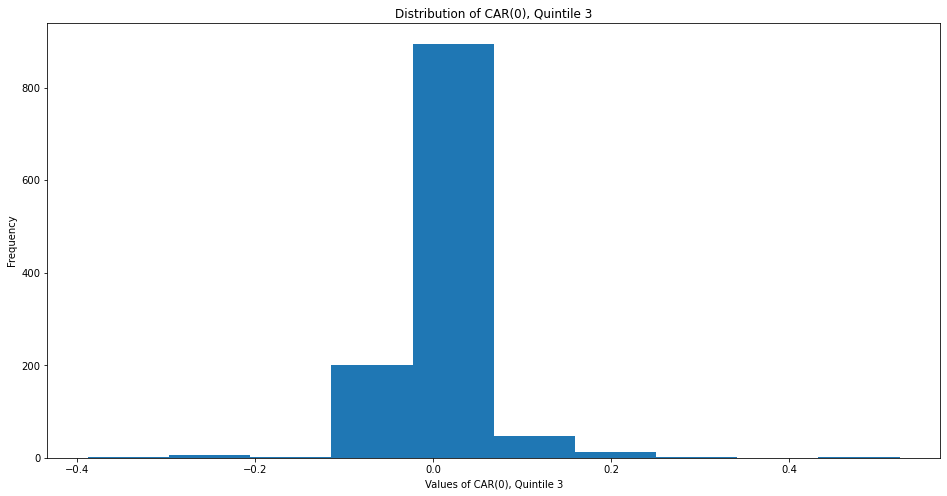

The t-value for CAR(-1,+1): 0.466032250880829


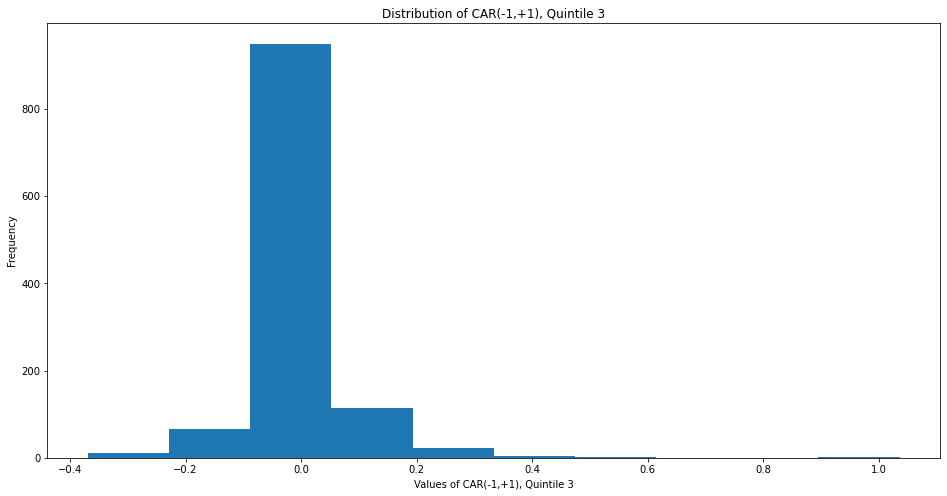

The t-value for CAR(-2,+2): -0.8129732827664988


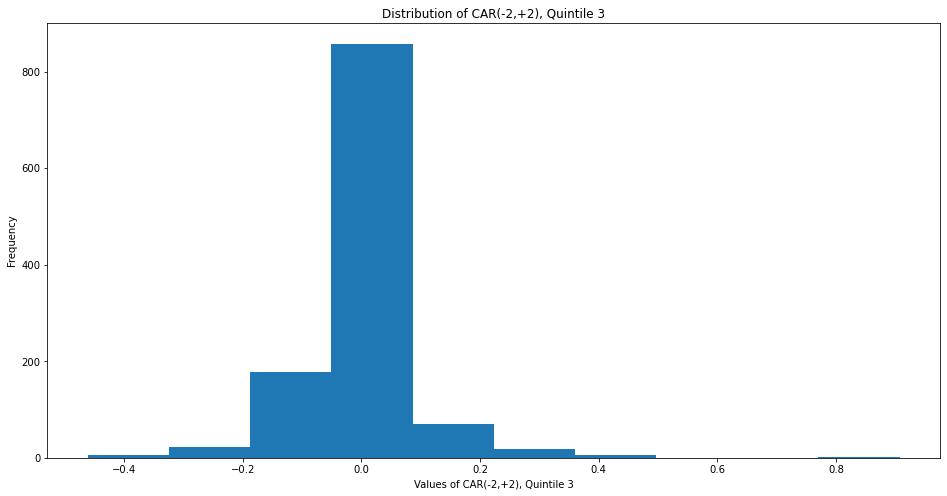

The t-value for CAR(-3,+3): -0.7726612176095409


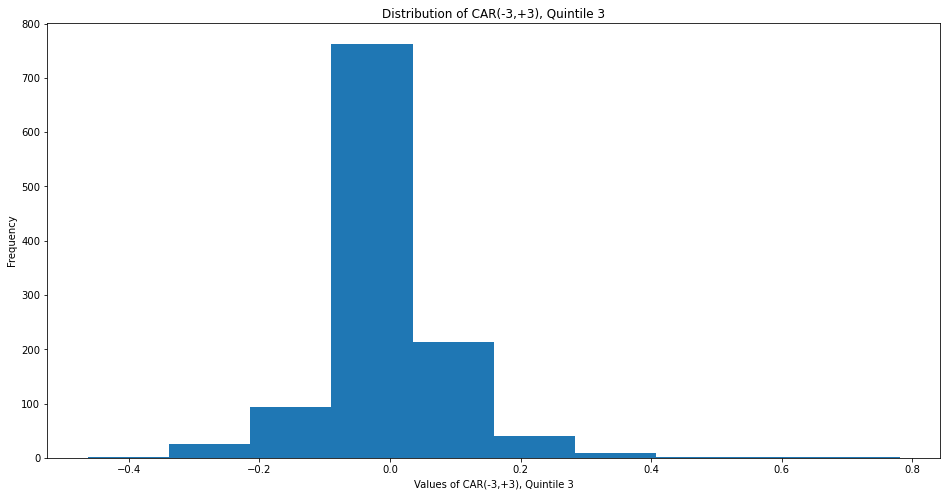

The t-value for CAR(-5,+5): -0.6653892943533439


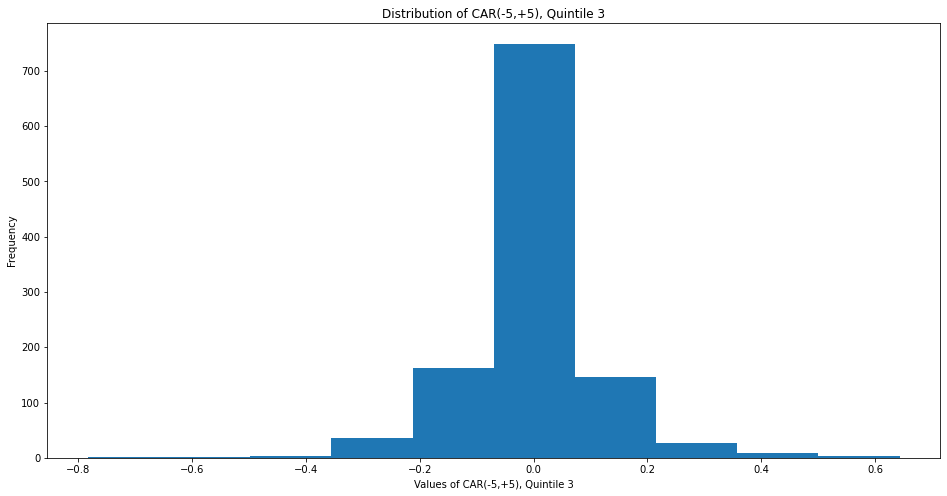

Quintile 4:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
0     2310.0 -0.051962   -0.051464   -0.160975    0.065930    0.041623   
7   773840.0  0.014872    0.022283    0.030310    0.030473    0.025334   
10  701345.0  0.033241   -0.026635    0.003092   -0.035914   -0.026212   
11  701345.0  0.033241   -0.026635    0.003092   -0.035914   -0.026212   
13  701345.0  0.033241   -0.026635    0.003092   -0.035914   -0.026212   

    Tone Score  Quintiles  
0    -0.001931          4  
7    -0.004075          4  
10   -0.002708          4  
11   -0.001801          4  
13   -0.005730          4  
The t-value for CAR(0): -0.35312256416274934


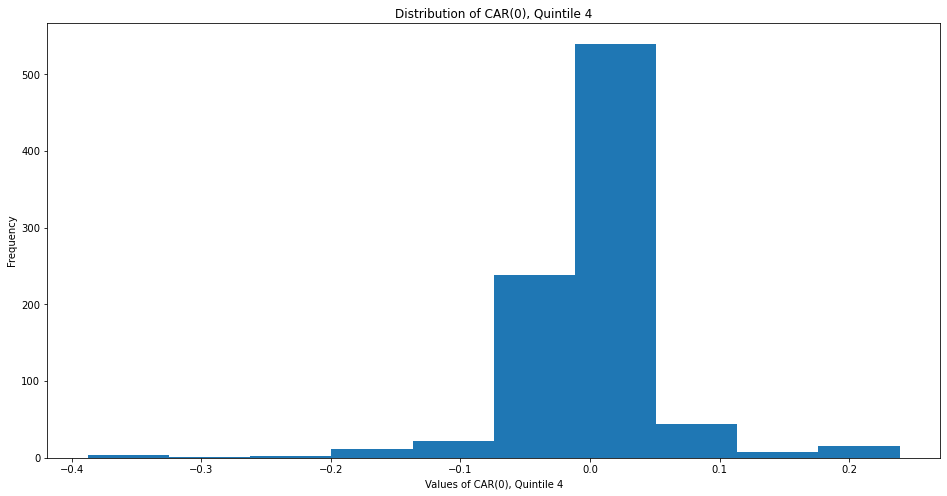

The t-value for CAR(-1,+1): 1.4554556057773151


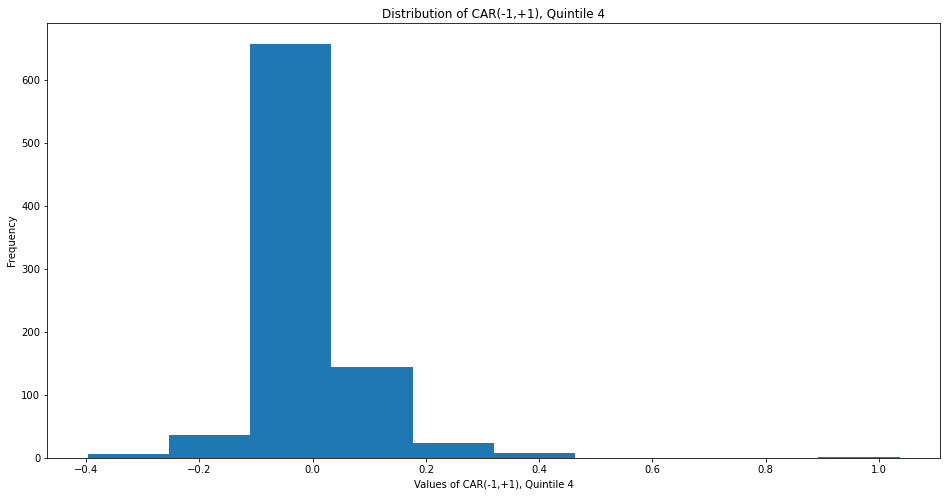

The t-value for CAR(-2,+2): 1.2602976942219786


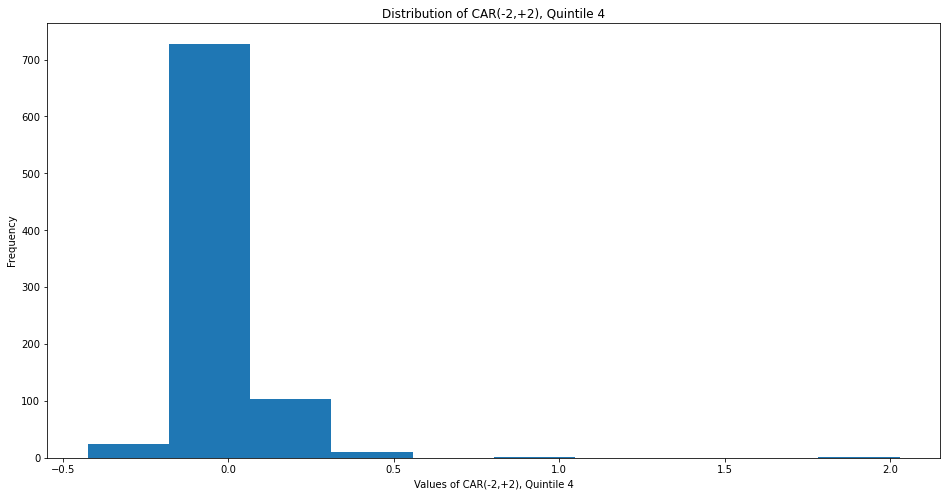

The t-value for CAR(-3,+3): 2.1453737116172342


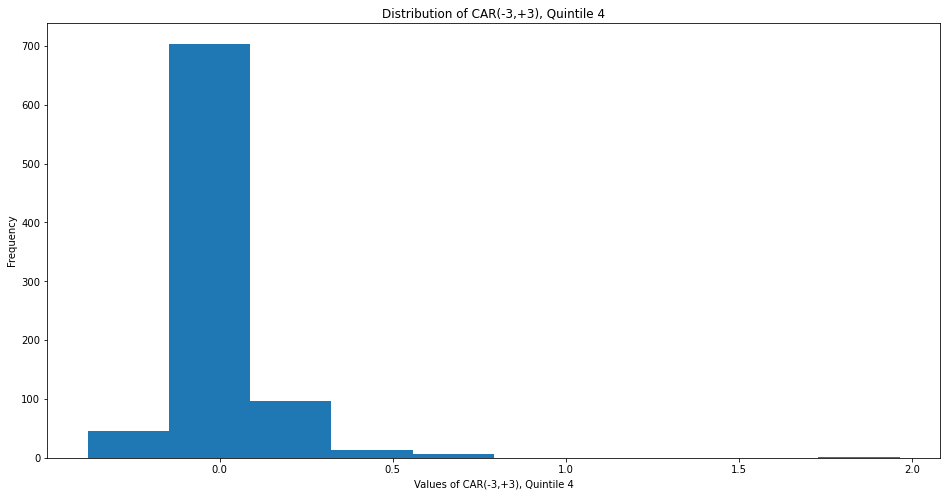

The t-value for CAR(-5,+5): 1.5381173898784535


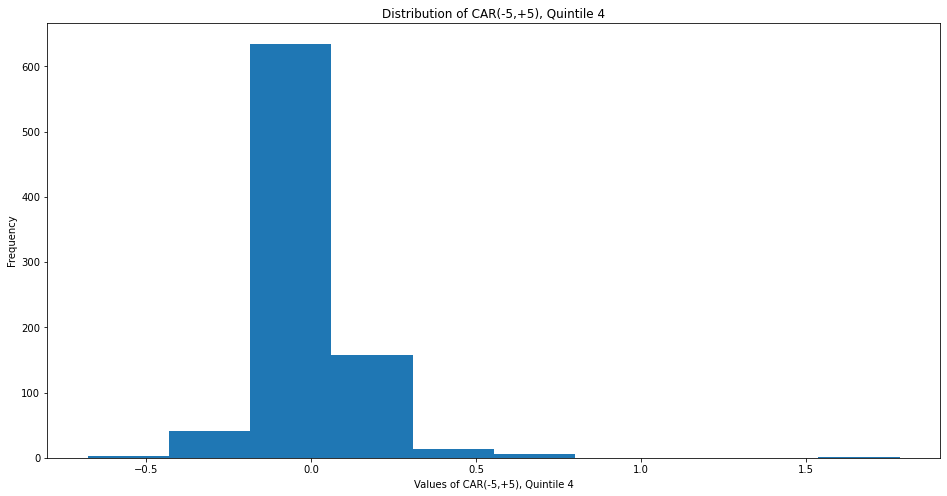

Quintile 5:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
5     1923.0  0.000993    0.042781    0.045301   -0.000927    0.022436   
8   703598.0 -0.009086   -0.059567   -0.171655   -0.066994   -0.075839   
9     4127.0 -0.031739    0.045431    0.118991    0.068599    0.054499   
12  701345.0  0.033241   -0.026635    0.003092   -0.035914   -0.026212   
16  701345.0 -0.016928   -0.052549   -0.050746   -0.029203   -0.059901   

    Tone Score  Quintiles  
5    -0.006861          5  
8    -0.006452          5  
9    -0.014352          5  
12   -0.011677          5  
16   -0.011677          5  
The t-value for CAR(0): -0.4809671617284249


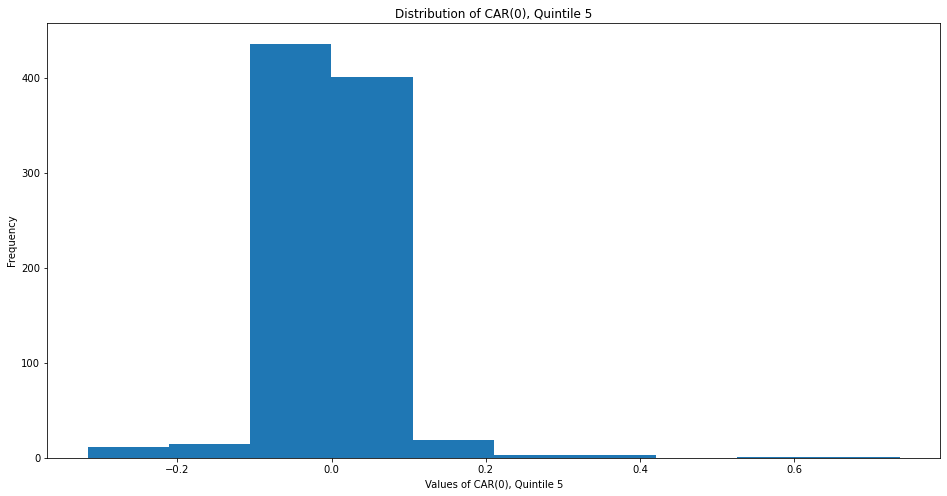

The t-value for CAR(-1,+1): -0.38347217914152093


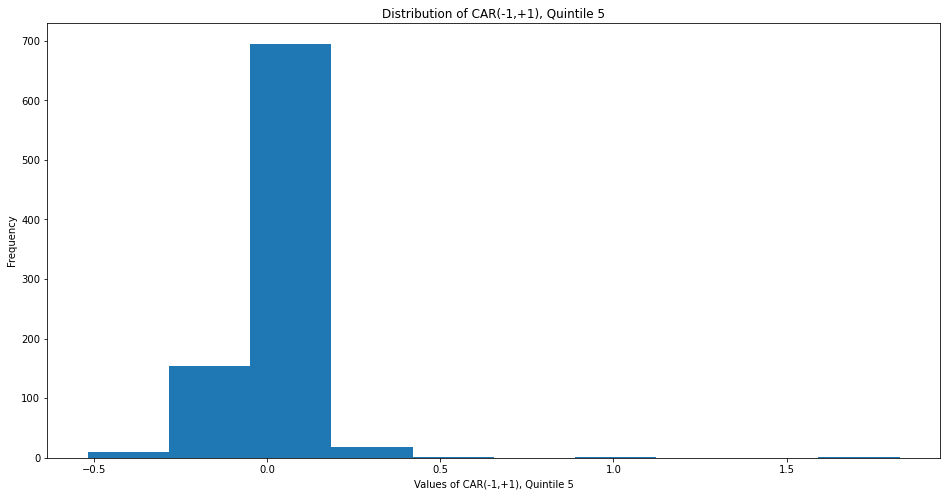

The t-value for CAR(-2,+2): -1.0256539025989986


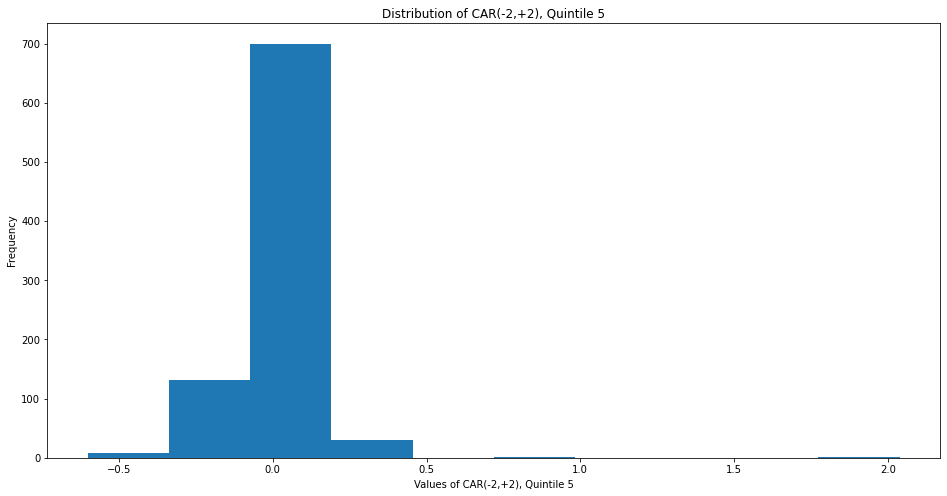

The t-value for CAR(-3,+3): -0.6505603198343185


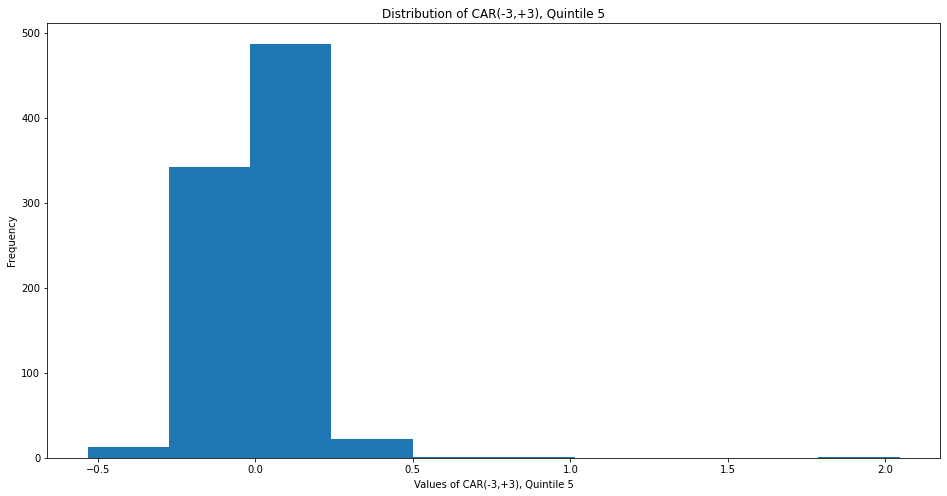

The t-value for CAR(-5,+5): -0.5613746428669504


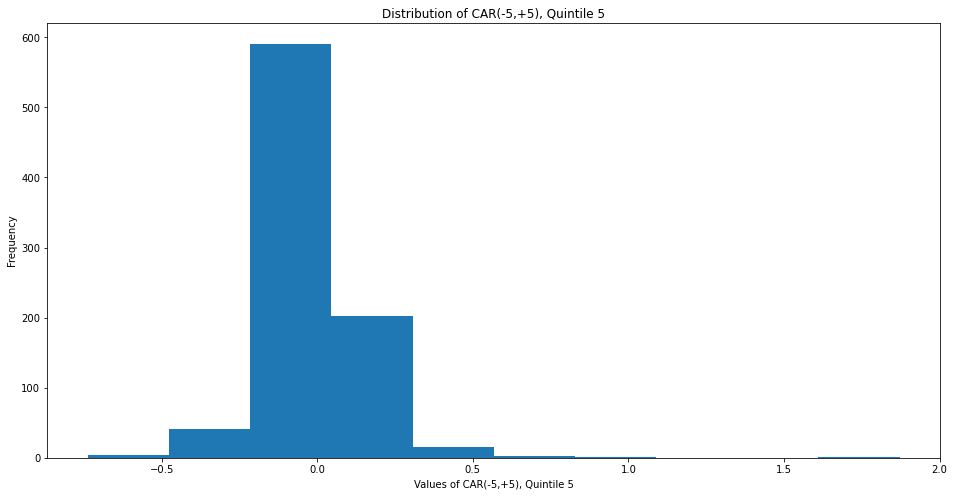

In [244]:
carlist= ('CAR(0)','CAR(-1,+1)','CAR(-2,+2)','CAR(-3,+3)','CAR(-5,+5)')
for i in range(1, 6):
    quintiledf = step1sentiment.loc[(step1sentiment['Quintiles'] == i)]
    print(f'Quintile {i}:')
    print(quintiledf.head())
    for car in carlist:
        ttests(quintiledf, car)
        plt.figure(figsize= (16,8))
        plt.hist(quintiledf[car])
        plt.ylabel('Frequency')
        plt.xlabel(f'Values of {car}, Quintile {i}')
        plt.title(f'Distribution of {car}, Quintile {i}')
        plt.show()

### Here we can see that for a given quintile there are some t-stats that could be considered significant. For example,  CAR(-3,+3): 2.1453737116172342 for Quintile 4. We also notice that the distributions become more spread out for each CAR at the varying quintiles. With the word scores the tvalues generally get worse for each CAR as the quinitle increases. 

# Sentiment Analysis Step 2

In [239]:
sentencescores = pd.read_csv('C:\\Users\\whill\\OneDrive\\Desktop\\MGT of Fin Institutions\\Hills_A12\\sentencescores.csv')
sentencescores.drop(['Unnamed: 0'], axis = 1, inplace=True)
sentencescores

CIK  Sentence Score
0     101771        0.071157
1     104030        0.283350
2      19617        0.632813
3     201499        0.453689
4     201513        0.306962
...      ...             ...
5176  921738        0.111871
5177  922864        0.096707
5178  928054        0.607013
5179  945764        0.123678
5180  946581        0.074252

[5181 rows x 2 columns]

In [240]:
step2sentiment = pd.merge(descstatsdata, sentencescores, how='inner', on='CIK')
step2sentiment['Quintiles'] = pd.qcut(step2sentiment['Sentence Score'], q = 5, labels= ['5','4','3','2','1'])
step2sentiment['Quintiles'] = pd.to_numeric(step2sentiment['Quintiles'], errors='coerce')
step2sentiment

CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
0       2310.0 -0.051962   -0.051464   -0.160975    0.065930    0.041623   
1     764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
2     764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
3     764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
4     764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
...        ...       ...         ...         ...         ...         ...   
4429  921114.0 -0.250451   -0.353438   -0.461260   -0.316572   -0.316334   
4430  921114.0 -0.250451   -0.353438   -0.461260   -0.316572   -0.316334   
4431  921114.0 -0.067316    0.074937   -0.113655   -0.209352   -0.211745   
4432  921114.0 -0.067316    0.074937   -0.113655   -0.209352   -0.211745   
4433  921114.0 -0.067316    0.074937   -0.113655   -0.209352   -0.211745   

      Sentence Score  Quintiles  
0           0.169161          3  
1           0.000498          5  
2           0.000644          5  
3           0.000498          5  
4           0.000644          5  
...              ...        ...  
4429        0.018804          5  
4430        0.219271          3  
4431        0.366135          2  
4432        0.018804          5  
4433        0.219271          3  

[4434 rows x 8 columns]

Quintile 1:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
7   773840.0  0.014872    0.022283    0.030310    0.030473    0.025334   
9     4127.0 -0.031739    0.045431    0.118991    0.068599    0.054499   
23    7039.0  0.045241    0.032369   -0.032643   -0.035586   -0.095870   
25    7039.0 -0.034278   -0.032183   -0.121693   -0.142879   -0.168344   
28    9346.0 -0.028268   -0.036126   -0.055357   -0.023471   -0.018215   

    Sentence Score  Quintiles  
7         0.737900          1  
9         0.430898          1  
23        0.972950          1  
25        0.972950          1  
28        0.829433          1  
The t-value for CAR(0): -1.9039437093952072


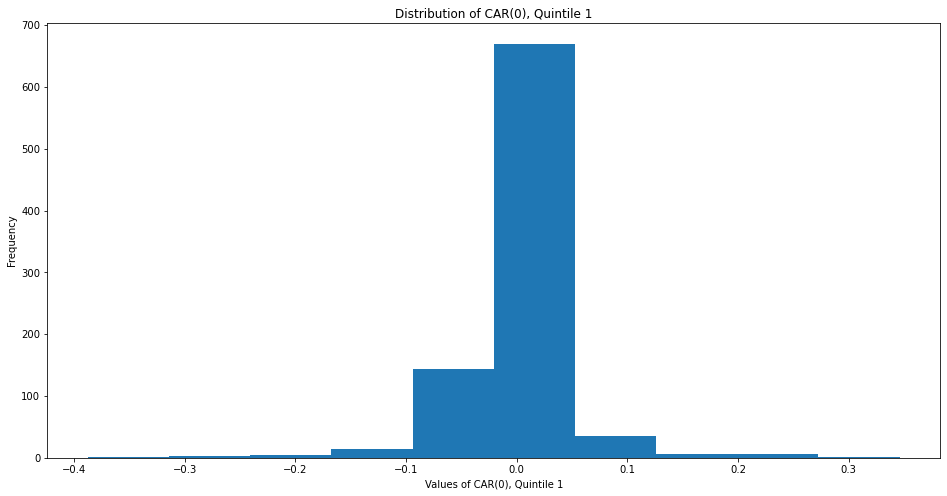

The t-value for CAR(-1,+1): -0.16830482389921103


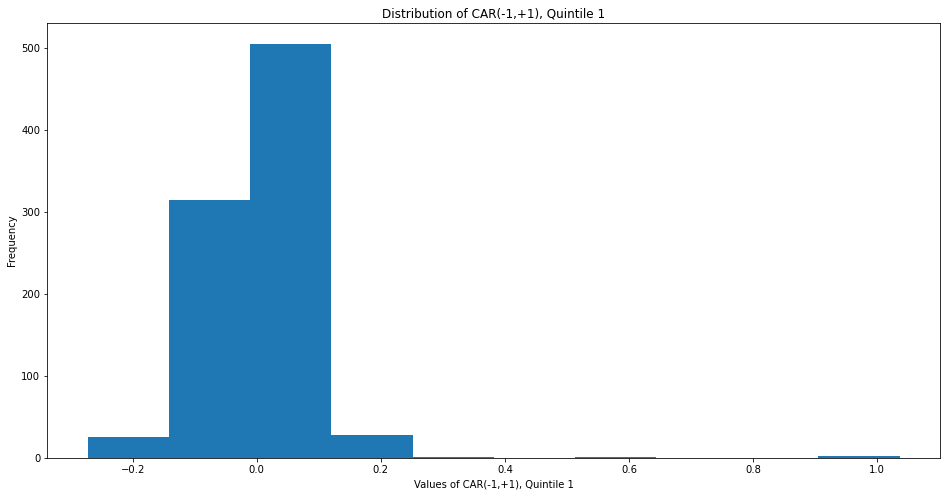

The t-value for CAR(-2,+2): 0.40100309607111495


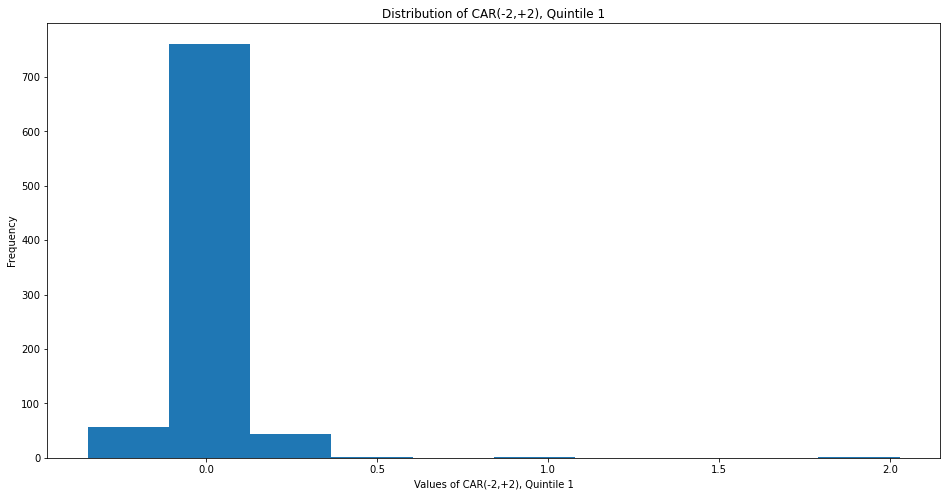

The t-value for CAR(-3,+3): 1.064089332850568


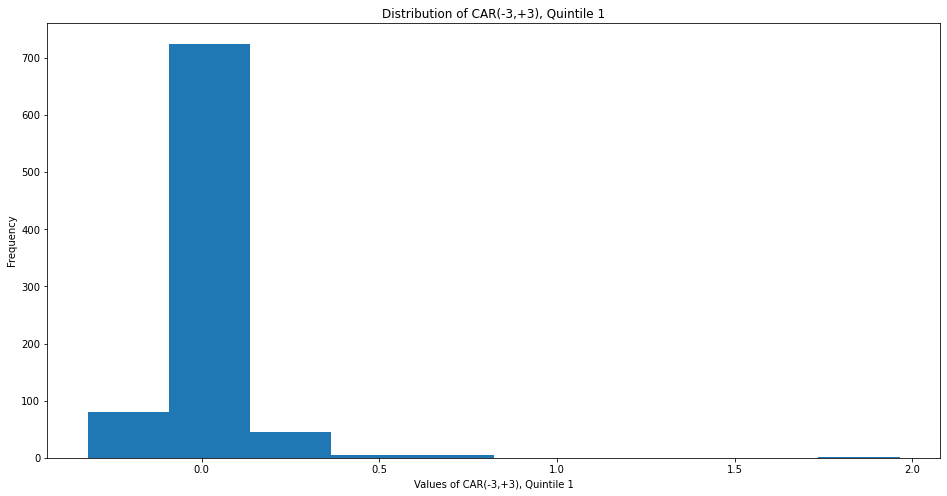

The t-value for CAR(-5,+5): 0.04063733612263242


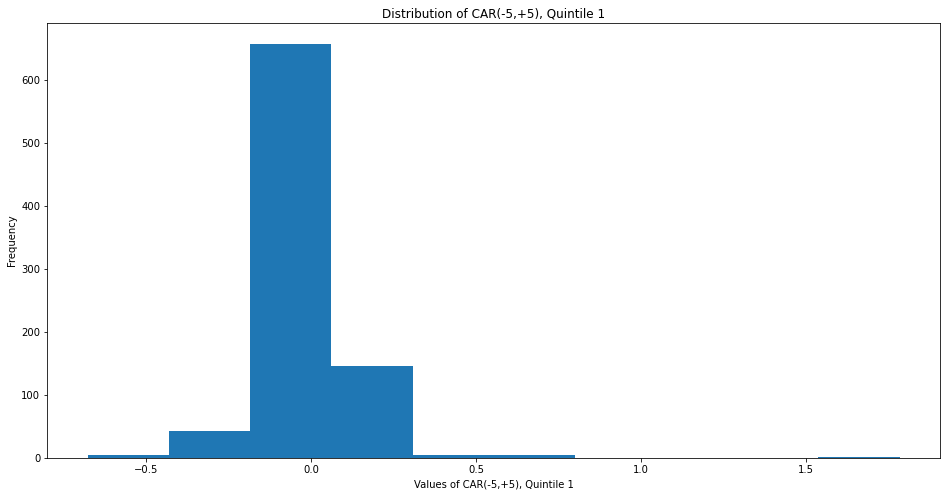

Quintile 2:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
12  701345.0  0.033241   -0.026635    0.003092   -0.035914   -0.026212   
16  701345.0 -0.016928   -0.052549   -0.050746   -0.029203   -0.059901   
21    6955.0  0.022224    0.026181   -0.033015   -0.053466   -0.078125   
39  732712.0  0.024751    0.006356   -0.005420    0.048999    0.053423   
42  732712.0 -0.004797   -0.053868    0.001402    0.010229   -0.022911   

    Sentence Score  Quintiles  
12        0.314786          2  
16        0.314786          2  
21        0.388479          2  
39        0.290349          2  
42        0.290349          2  
The t-value for CAR(0): -0.28585453680667916


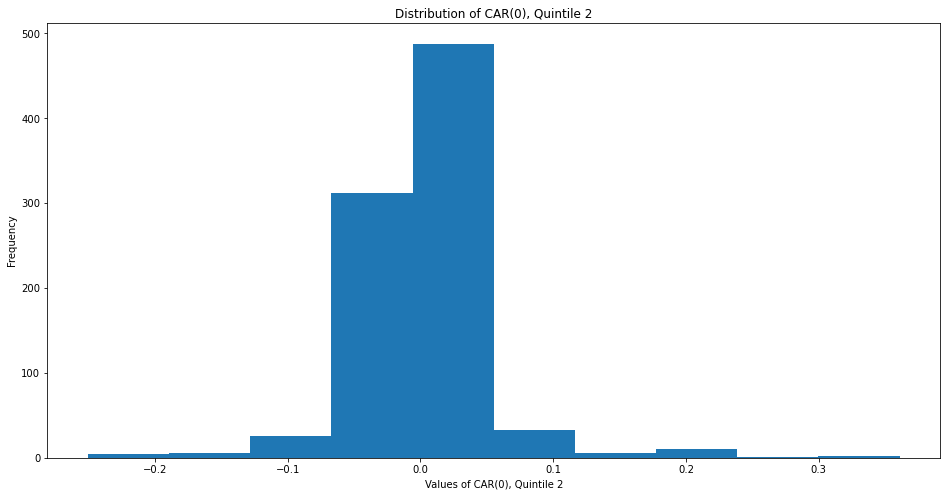

The t-value for CAR(-1,+1): -2.0029008072913537


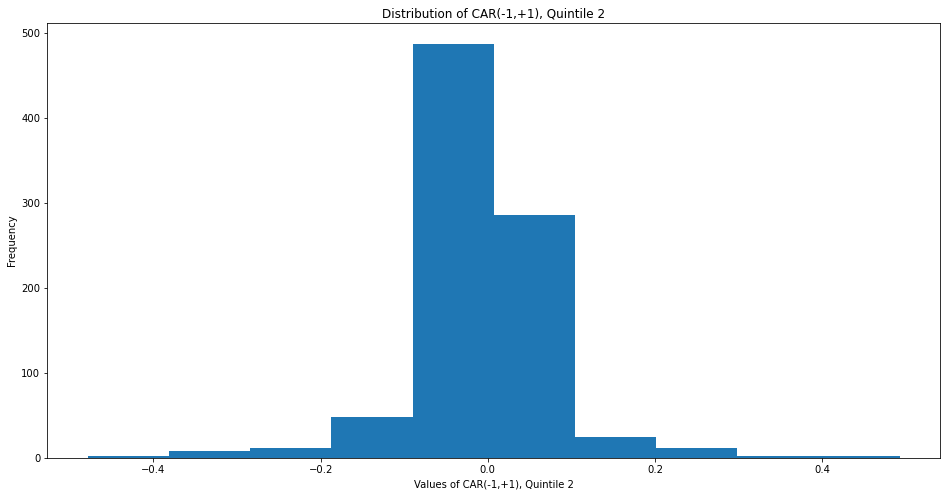

The t-value for CAR(-2,+2): -1.5404188687340297


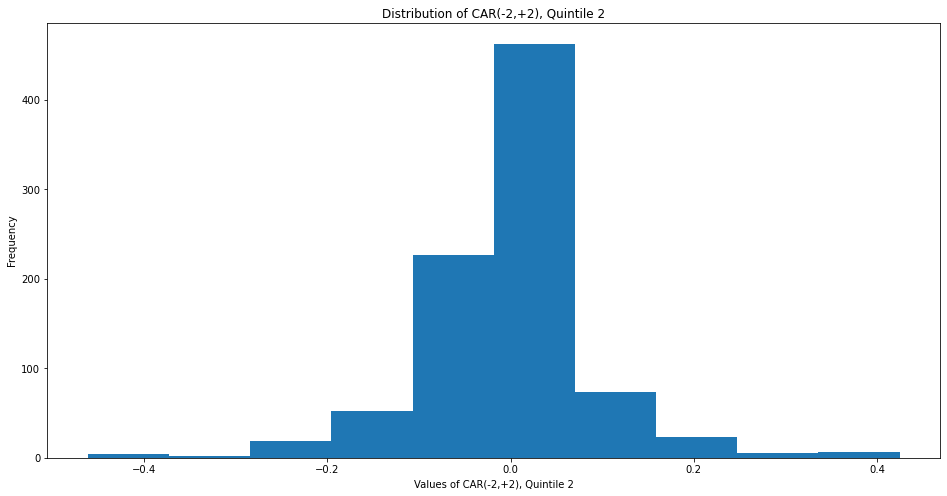

The t-value for CAR(-3,+3): -1.022832703107219


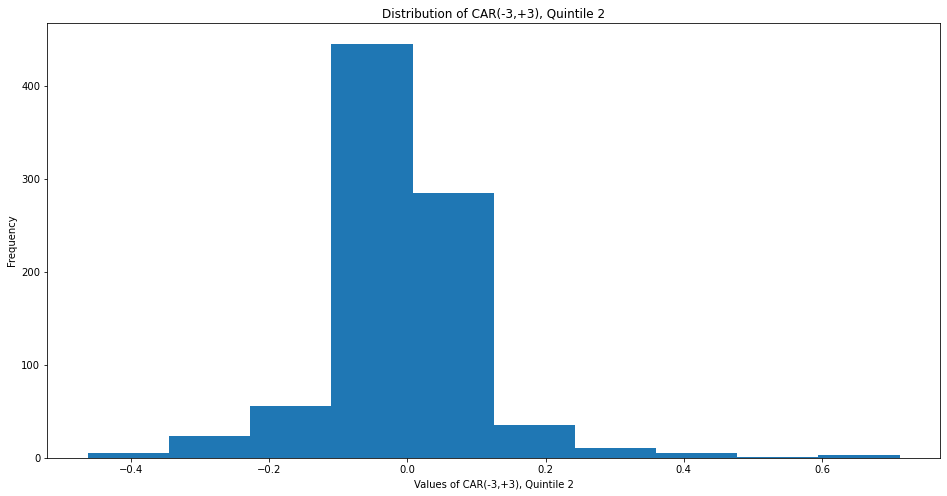

The t-value for CAR(-5,+5): 0.23190735778245006


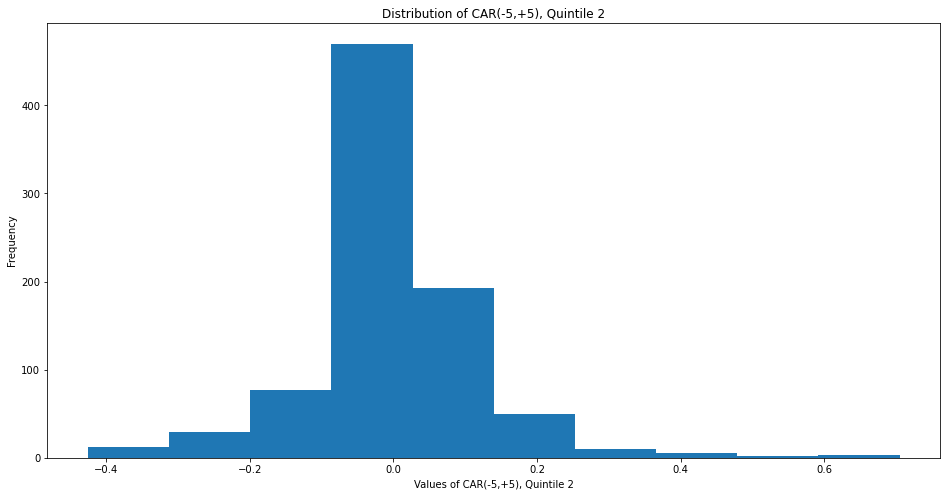

Quintile 3:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
0     2310.0 -0.051962   -0.051464   -0.160975    0.065930    0.041623   
5     1923.0  0.000993    0.042781    0.045301   -0.000927    0.022436   
18    5187.0  0.002333    0.015658    0.001795    0.006706         NaN   
37  354611.0 -0.087609   -0.480117   -0.450594   -0.465371   -0.372973   
38  732712.0  0.024751    0.006356   -0.005420    0.048999    0.053423   

    Sentence Score  Quintiles  
0         0.169161          3  
5         0.181591          3  
18        0.268555          3  
37        0.212563          3  
38        0.234444          3  
The t-value for CAR(0): -0.11021779317060879


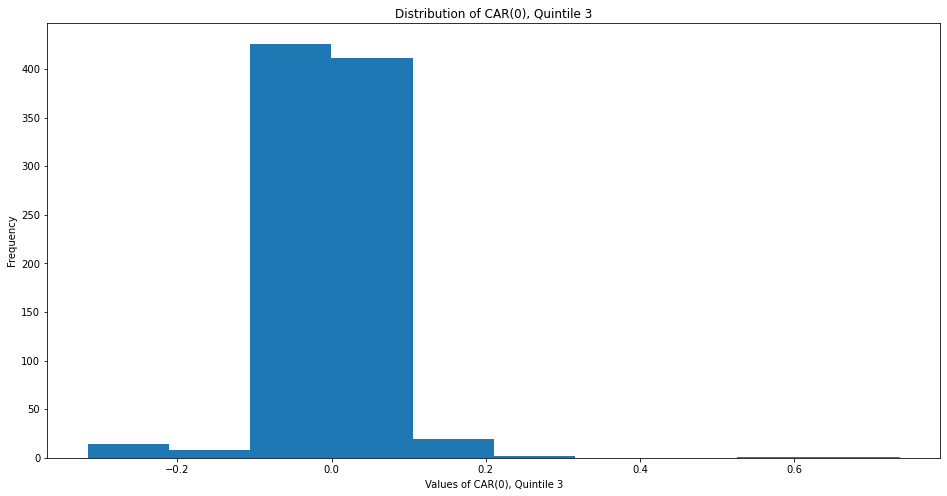

The t-value for CAR(-1,+1): 0.6421778595887776


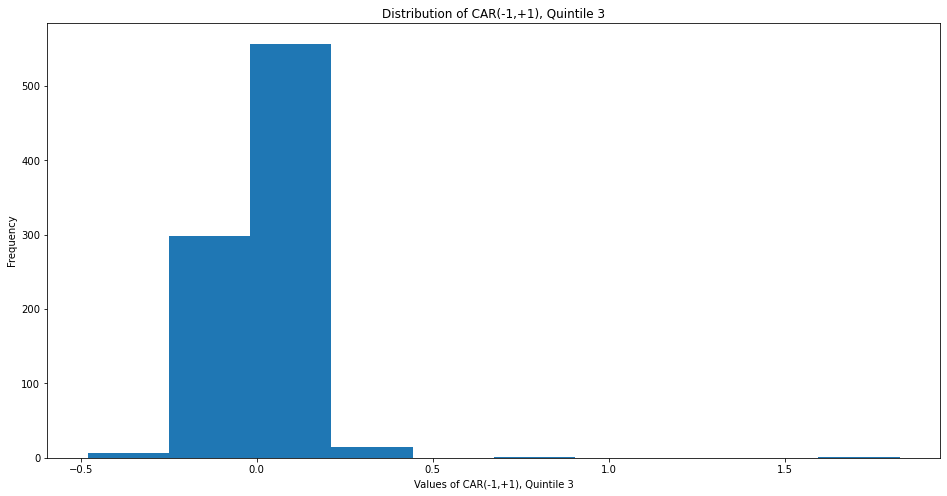

The t-value for CAR(-2,+2): 0.045962840060700824


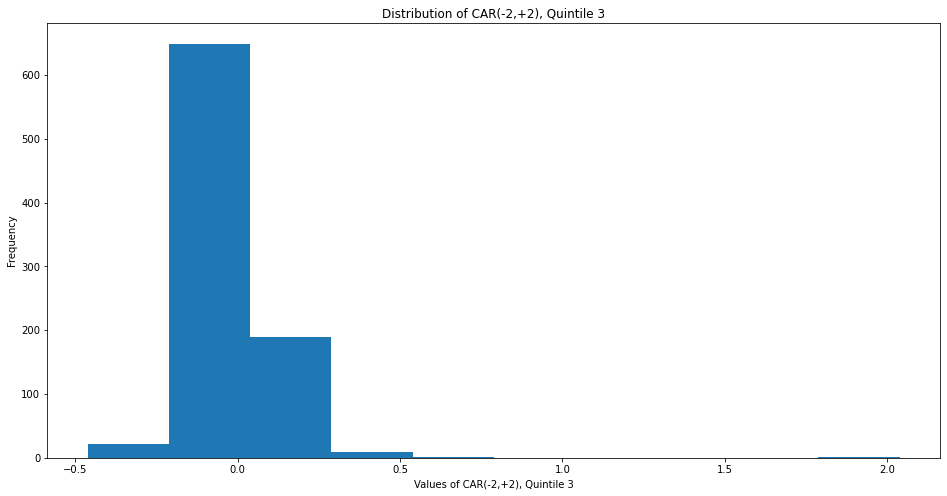

The t-value for CAR(-3,+3): 0.8238502304486


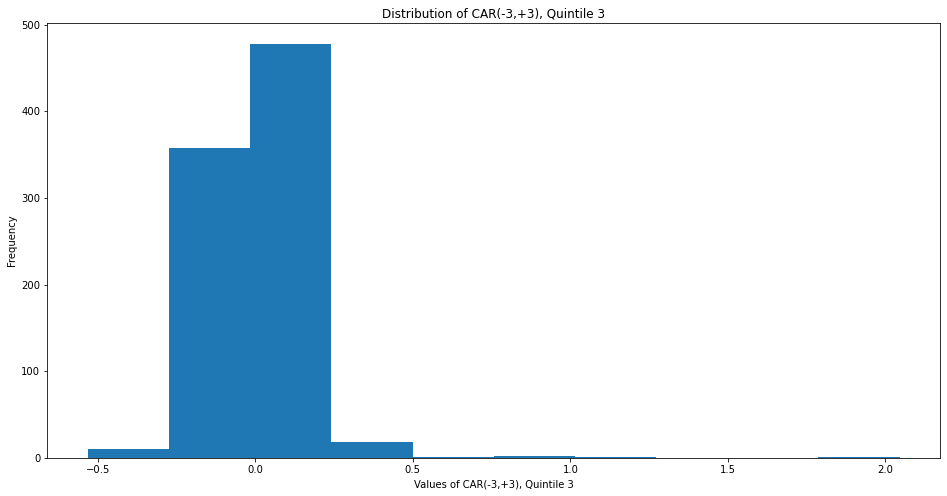

The t-value for CAR(-5,+5): 1.0847791075607642


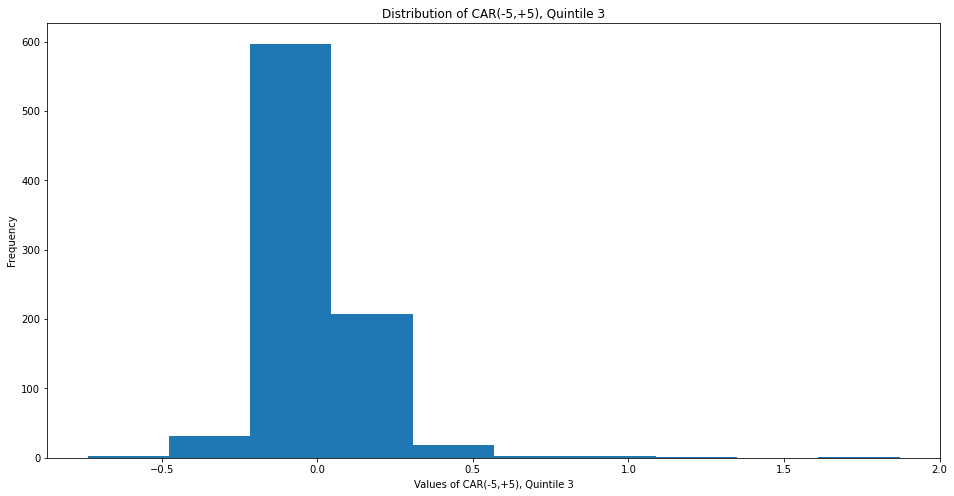

Quintile 4:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
8   703598.0 -0.009086   -0.059567   -0.171655   -0.066994   -0.075839   
10  701345.0  0.033241   -0.026635    0.003092   -0.035914   -0.026212   
14  701345.0 -0.016928   -0.052549   -0.050746   -0.029203   -0.059901   
19  763730.0  0.304661    0.182847    0.346056    0.336440    0.233732   
20  311471.0 -0.005424    0.005871    0.034287    0.038698    0.024542   

    Sentence Score  Quintiles  
8         0.123347          4  
10        0.128867          4  
14        0.128867          4  
19        0.126759          4  
20        0.033866          4  
The t-value for CAR(0): 0.3874920127340289


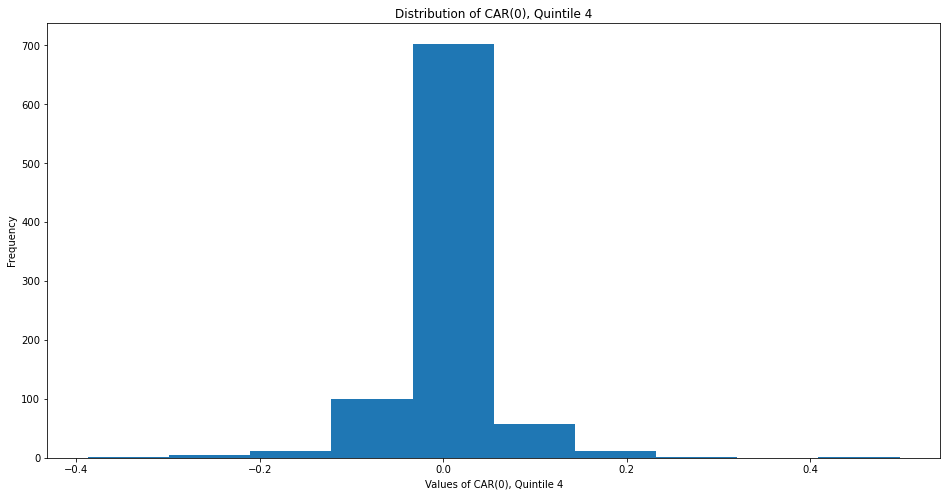

The t-value for CAR(-1,+1): 2.223855035813952


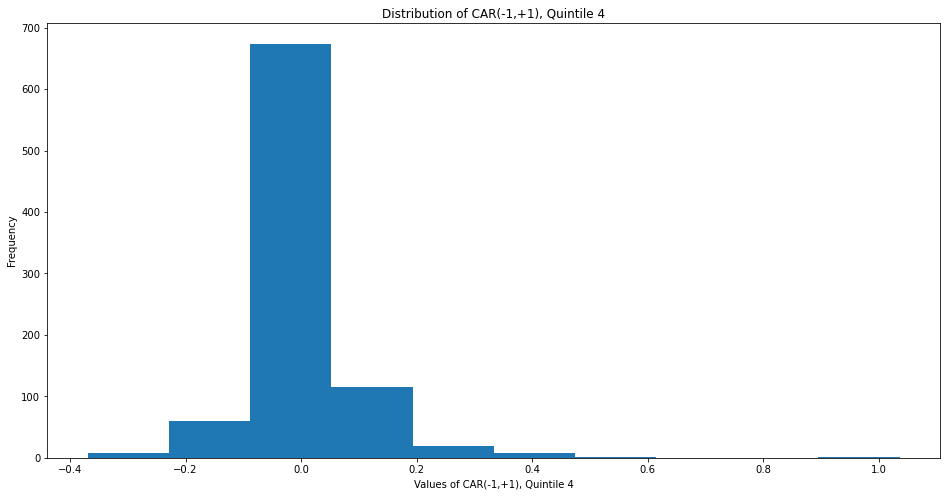

The t-value for CAR(-2,+2): 0.6784268574013127


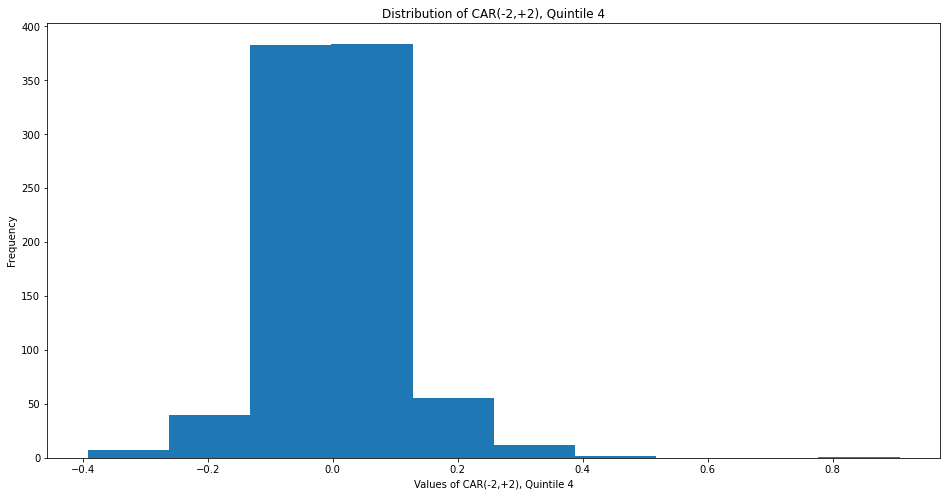

The t-value for CAR(-3,+3): 0.7167288519312278


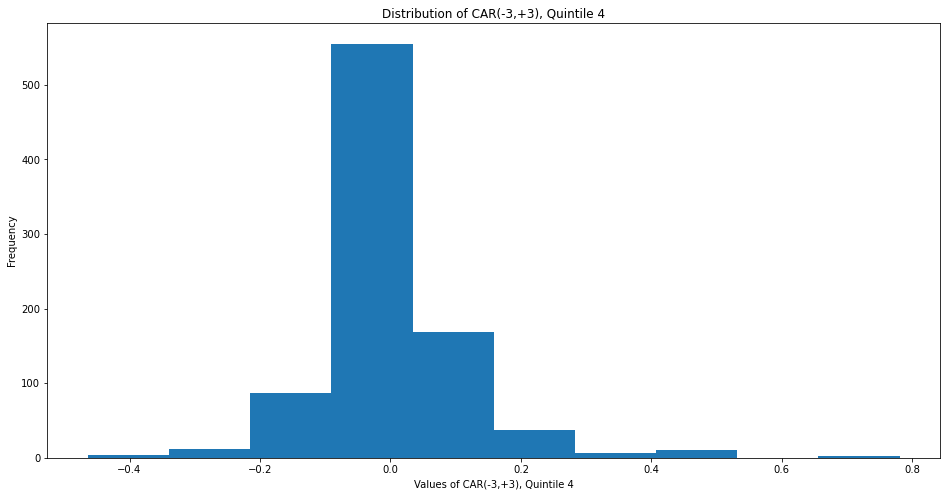

The t-value for CAR(-5,+5): 0.6437663203429347


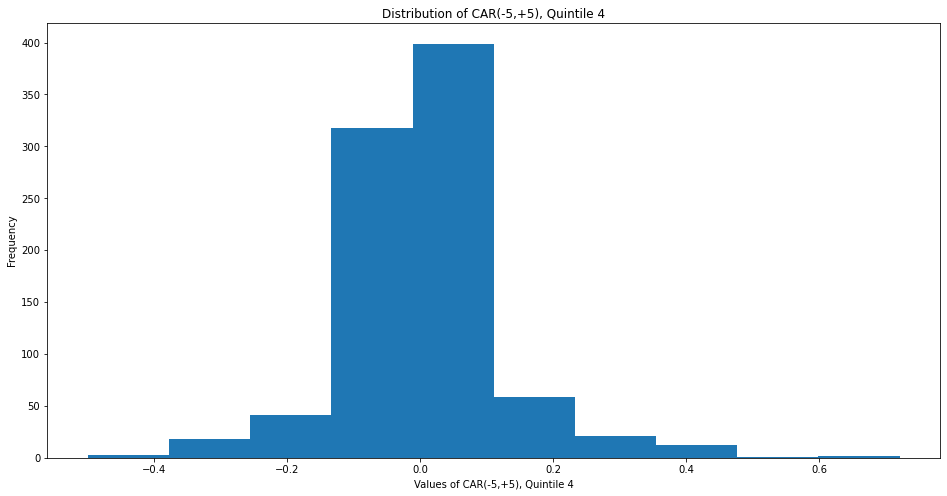

Quintile 5:
         CIK    CAR(0)  CAR(-1,+1)  CAR(-2,+2)  CAR(-3,+3)  CAR(-5,+5)  \
1   764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
2   764622.0 -0.001764    0.002249    0.030726    0.026210   -0.003986   
3   764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
4   764622.0 -0.008882   -0.029415   -0.018257   -0.011587   -0.019582   
6  1122304.0  0.048764    0.044443    0.032067    0.023262    0.026370   

   Sentence Score  Quintiles  
1        0.000498          5  
2        0.000644          5  
3        0.000498          5  
4        0.000644          5  
6       -0.003700          5  
The t-value for CAR(0): 2.436204162539324


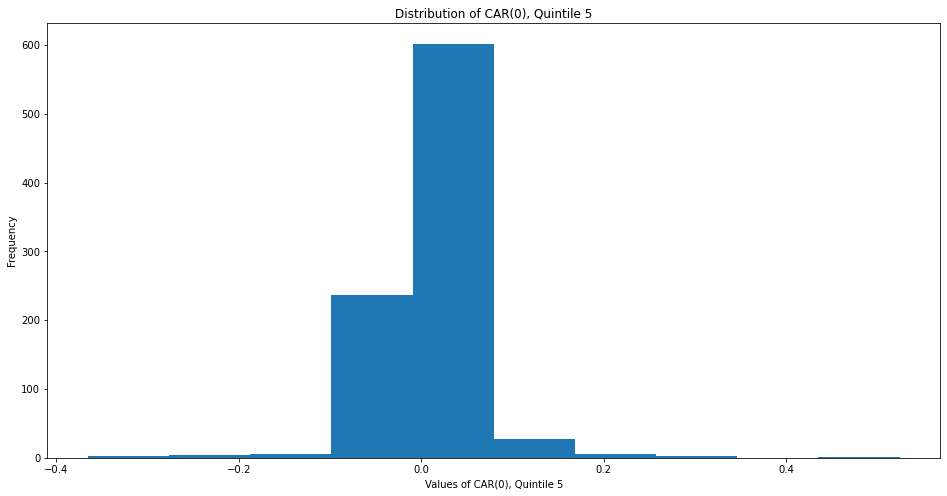

The t-value for CAR(-1,+1): 1.654540573982328


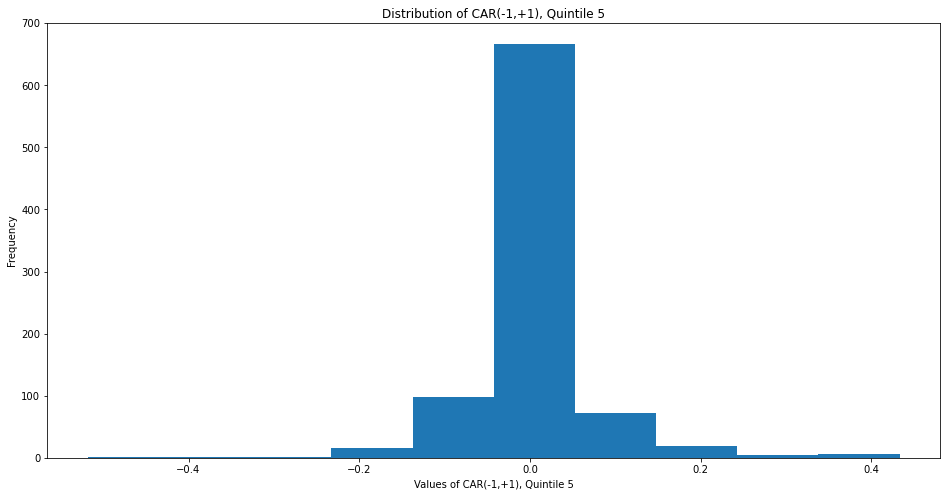

The t-value for CAR(-2,+2): 0.833399160822038


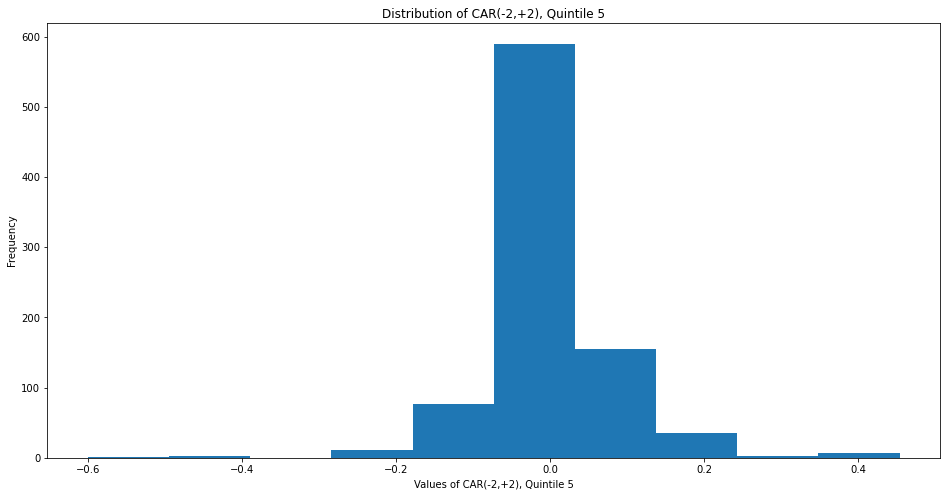

The t-value for CAR(-3,+3): 0.5692776079285911


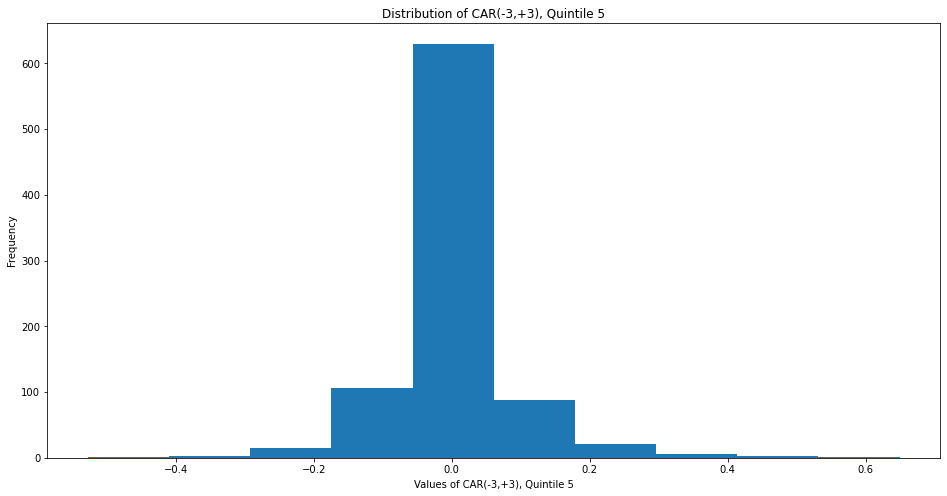

The t-value for CAR(-5,+5): 0.6861137166494862


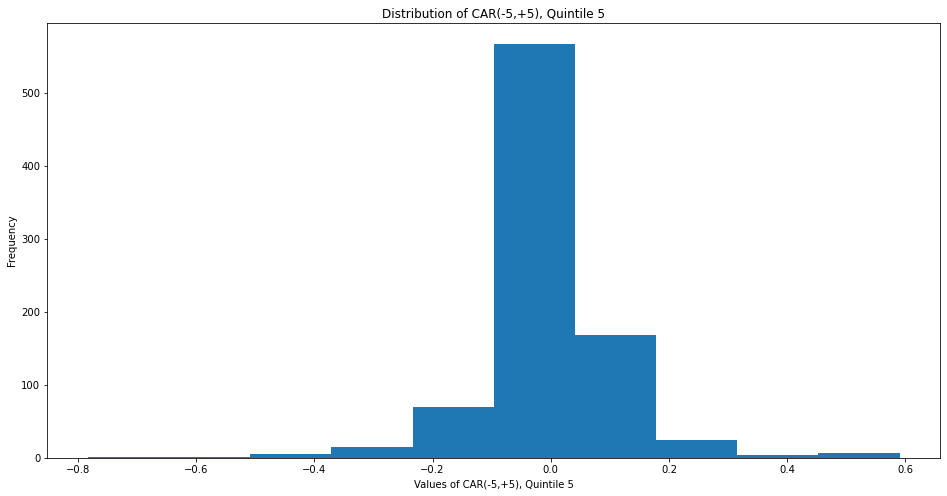

In [245]:
carlist= ('CAR(0)','CAR(-1,+1)','CAR(-2,+2)','CAR(-3,+3)','CAR(-5,+5)')
for i in range(1, 6):
    quintiledf = step2sentiment.loc[(step2sentiment['Quintiles'] == i)]
    print(f'Quintile {i}:')
    print(quintiledf.head())
    for car in carlist:
        ttests(quintiledf, car)
        plt.figure(figsize= (16,8))
        plt.hist(quintiledf[car])
        plt.ylabel('Frequency')
        plt.xlabel(f'Values of {car}, Quintile {i}')
        plt.title(f'Distribution of {car}, Quintile {i}')
        plt.show()

### In this section we see some tvalues increase to better levels of significance and it tends to better the tstats of ones that had increased previously. The distributions tend to follow a similar pattern as they did previously, not much change in terms of spread. 

# Sentiment Analysis Step 3: BERT

## BERT did not compile in time to run statistics hopefully I can get some points for implementing the code. 

In [ ]:
bertscores = pd.read_csv('C:\\Users\\whill\\OneDrive\\Desktop\\MGT of Fin Institutions\\Hills_A12\\bertscores.csv')
bertscores.drop(['Unnamed: 0'], axis = 1, inplace=True)
bertscores

In [ ]:
step3sentiment = pd.merge(descstatsdata, bertscores, how='inner', on='CIK')
step3sentiment['Quintiles'] = pd.qcut(step3sentiment['Sentence Score'], q = 5, labels= ['5','4','3','2','1'])
step3sentiment['Quintiles'] = pd.to_numeric(step3sentiment['Quintiles'], errors='coerce')
step3sentiment

In [ ]:
carlist= ('CAR(0)','CAR(-1,+1)','CAR(-2,+2)','CAR(-3,+3)','CAR(-5,+5)')
for i in range(1, 5):
    quintiledf = step3sentiment.loc[(step3sentiment['Quintiles'] == i)]
    print(f'Quintile {i}:')
    print(quintiledf.head())
    for car in carlist:
        ttests(step3sentiment, car)
        plt.figure(figsize= (16,8))
        plt.hist(step3sentiment[car])
        plt.ylabel('Frequency')
        plt.xlabel(f'Values of {car}, Quintile {i}')
        plt.title(f'Distribution of {car}, Quintile {i}')
        plt.show()